## Title Cell

In [2]:
# Import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import csv, convert to a dataframe. List the columns so we know how to clean it up
diabetes_csv = pd.read_csv("source_data/diabetes_indicators.csv")
diabetes_df = pd.DataFrame(diabetes_csv)
diabetes_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

## William

In [5]:
# Define colors
colors = ['#CACACA','#78909C','#616161']

# Trim the dataframe so it is only our variables of interest
df_trimmed = diabetes_df[["Diabetes_012", "Income", "Education", "Age", "HvyAlcoholConsump", "Fruits", "Veggies", "CholCheck", "HighChol", "PhysActivity", "BMI"]].copy()
df_trimmed.head()

,Diabetes_012,Income,Education,Age,HvyAlcoholConsump,Fruits,Veggies,CholCheck,HighChol,PhysActivity,BMI
0,0.0,3.0,4.0,9.0,0.0,0.0,1.0,1.0,1.0,0.0,40.0
1,0.0,1.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0
2,0.0,8.0,4.0,9.0,0.0,1.0,0.0,1.0,1.0,0.0,28.0
3,0.0,6.0,3.0,11.0,0.0,1.0,1.0,1.0,0.0,1.0,27.0
4,0.0,4.0,5.0,11.0,0.0,1.0,1.0,1.0,1.0,1.0,24.0


In [6]:
# Group by fruit consumption and diabetes status, count the number of participants for each category
dia_fruits = df_trimmed.groupby(["Fruits", "Diabetes_012"]).size().reset_index(name='count')

# Separate 0 fruit values from 1 fruit values, copying the tables so we can easily perform actions on them
nofruits = dia_fruits[dia_fruits["Fruits"] == 0].copy()
yesfruits = dia_fruits[dia_fruits["Fruits"] == 1].copy()

# Find the total respondents per category (fruit and no fruit)
# Create a new column for the proportion of respondents in each row out of their respective category
nofruits_sum = nofruits["count"].sum()
nofruits["proportion"] = (nofruits["count"] / nofruits_sum) * 100

yesfruits_sum = yesfruits["count"].sum()
yesfruits["proportion"] = (yesfruits["count"] / yesfruits_sum) * 100

# Using the pd.concat() function, combine the two tables into the new fruitstack df, which shows the proportions
fruitstack = pd.concat([nofruits, yesfruits], ignore_index=False)
fruitstack




,Fruits,Diabetes_012,count,proportion
0,0.0,0.0,76287,82.221767
1,0.0,1.0,1842,1.985299
2,0.0,2.0,14653,15.792934
3,1.0,0.0,137416,85.405661
4,1.0,1.0,2789,1.733396
5,1.0,2.0,20693,12.860943


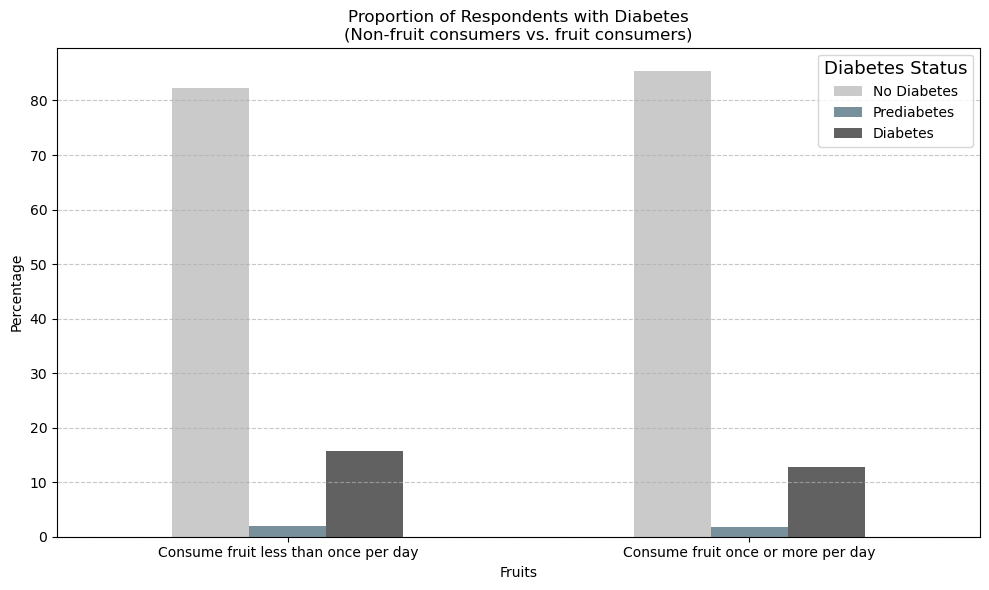

In [7]:
# Set up pivot table to reorganize fruitstack df
fruit_pivot_df = fruitstack.pivot(index='Fruits', columns='Diabetes_012', values='proportion')

# Rename columns for easy display formatting
fruit_pivot_df.columns = ['No Diabetes', 'Prediabetes', 'Diabetes']


# Rename indices for easy display formatting
index_mapping = {0.0: 'Consume fruit less than once per day', 1.0: 'Consume fruit once or more per day'}
fruit_pivot_df.index = fruit_pivot_df.index.map(index_mapping)

# Plot the table
fruit_pivot_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Proportion of Respondents with Diabetes\n(Non-fruit consumers vs. fruit consumers)')
plt.xlabel('Fruits')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(fruit_pivot_df.index)), labels=fruit_pivot_df.index, rotation=0)
plt.legend(title='Diabetes Status', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("images/fruit_vs_diabetes.png")
plt.show()

In [8]:
# Run the Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(fruit_pivot_df)

# Output the results
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The two samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The two samples are therefore statistically different.")

Chi-squared statistic: 0.3775524619686453
p-value: 0.8279717603927735
Degrees of freedom: 2
Expected frequencies:
[[83.81371394  1.85934759 14.32693847]
 [83.81371394  1.85934759 14.32693847]]
The p-value of the chi-sauqred test is 0.828. As this value is greater than 0.05, we fail to reject the null hypothesis. The two samples are therefore not statistically different.


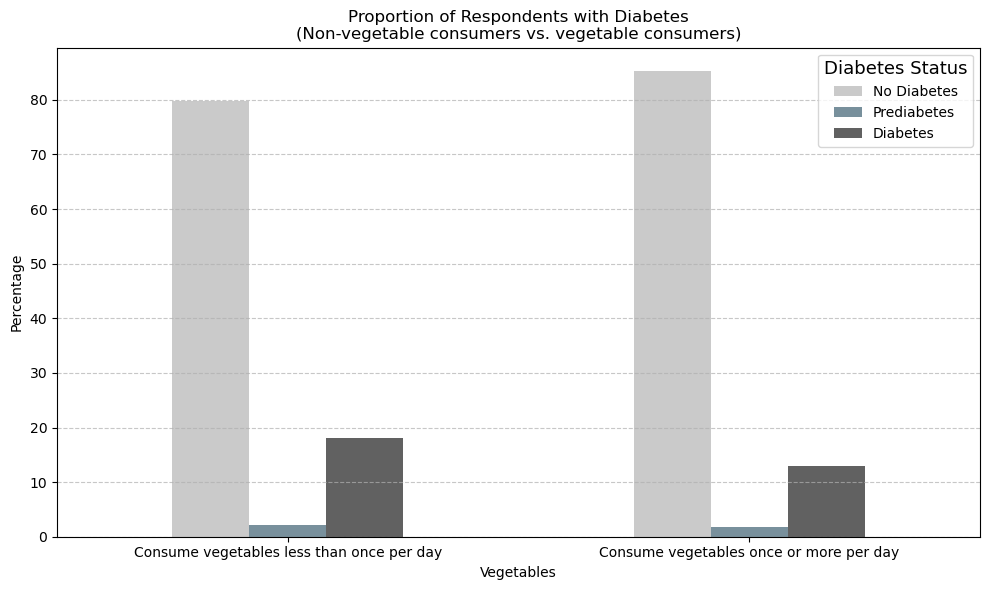

In [9]:
# Group by veg consumption and diabetes status, count the number of participants for each category
dia_veg = df_trimmed.groupby(["Veggies", "Diabetes_012"]).size().reset_index(name='count')

# Separate 0 veg values from 1 veg values, copying the tables so we can easily perform actions on them
noveg = dia_veg[dia_veg["Veggies"] == 0].copy()
yesveg = dia_veg[dia_veg["Veggies"] == 1].copy()

# Find the total respondents per category (veg and no veg)
# Create a new column for the proportion of respondents in each row out of their respective category
noveg_sum = noveg["count"].sum()
noveg["proportion"] = (noveg["count"] / noveg_sum) * 100

yesveg_sum = yesveg["count"].sum()
yesveg["proportion"] = (yesveg["count"] / yesveg_sum) * 100

# Using the pd.concat() function, combine the two tables into the new vegstack df, which shows the proportions
vegstack = pd.concat([noveg, yesveg], ignore_index=False)

# Pivot the table
veg_pivot_df = vegstack.pivot(index='Veggies', columns='Diabetes_012', values='proportion')

# Rename columns for easy display formatting
veg_pivot_df.columns = ['No Diabetes', 'Prediabetes', 'Diabetes']

# Rename indices for easy display formatting
index_mapping = {0.0: 'Consume vegetables less than once per day', 1.0: 'Consume vegetables once or more per day'}
veg_pivot_df.index = veg_pivot_df.index.map(index_mapping)

# Plot the table
veg_pivot_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Proportion of Respondents with Diabetes\n(Non-vegetable consumers vs. vegetable consumers)')
plt.xlabel('Vegetables')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(veg_pivot_df.index)), labels=veg_pivot_df.index, rotation=0)
plt.legend(title='Diabetes Status', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("images/veg_vs_diabetes.png")
plt.show()

In [10]:
# Run the Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(veg_pivot_df)

# Output the results
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The two samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The two samples are therefore statistically different.")

Chi-squared statistic: 1.058840747315825
p-value: 0.5889462395188043
Degrees of freedom: 2
Expected frequencies:
[[82.52341063  1.98332244 15.49326693]
 [82.52341063  1.98332244 15.49326693]]
The p-value of the chi-sauqred test is 0.5889. As this value is greater than 0.05, we fail to reject the null hypothesis. The two samples are therefore not statistically different.


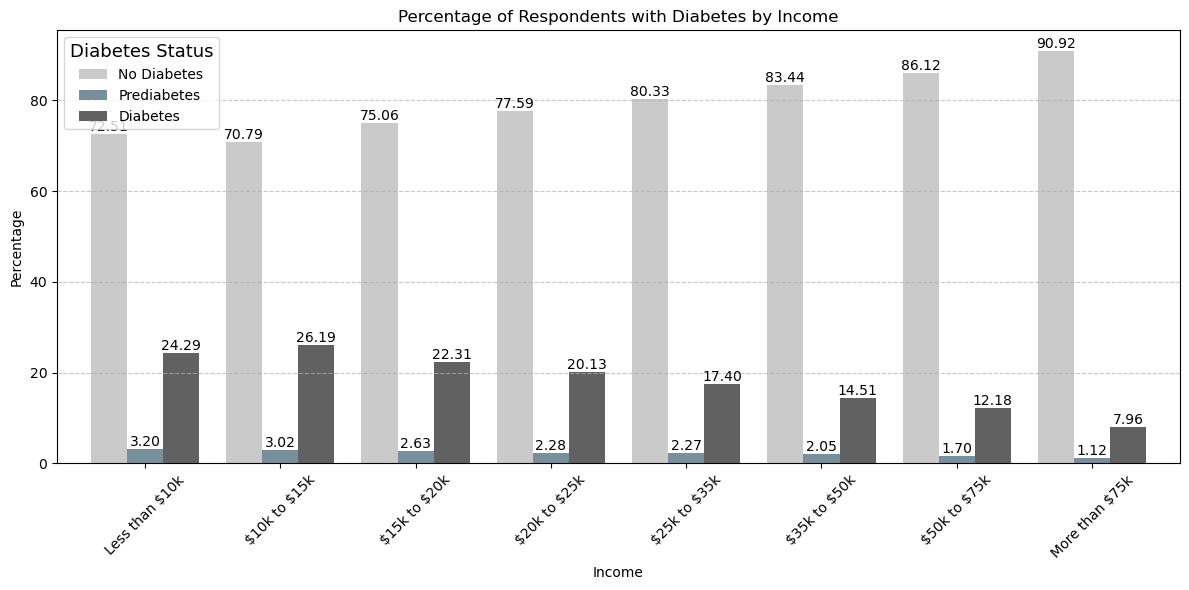

In [11]:
# Group by income and diabetes, count the number of responses in each row
dia_income = df_trimmed.groupby(["Income", "Diabetes_012"]).size().reset_index(name='count')

# Calculate the sum of responses for each income group
income_group_sum = dia_income.groupby('Income')['count'].transform('sum')

# Calculate the proportions
dia_income['proportion'] = (dia_income['count'] / income_group_sum) * 100

# Pivot the table
income_pivot_df = dia_income.pivot(index='Income', columns='Diabetes_012', values='proportion')

# Rename columns for easy display formatting
income_pivot_df.columns = ['No Diabetes', 'Prediabetes', 'Diabetes']

# Rename indices for easy display formatting
index_mapping = {1.0: 'Less than \$10k',
                 2.0: '\$10k to \$15k',
                 3.0: '\$15k to \$20k',
                 4.0: '\$20k to \$25k',
                 5.0: '\$25k to \$35k',
                 6.0: '\$35k to \$50k',
                 7.0: '\$50k to \$75k',
                 8.0: 'More than \$75k'
                }
income_pivot_df.index = income_pivot_df.index.map(index_mapping)

# Plot the table
ax = income_pivot_df.plot(kind='bar', width = .8, figsize=(12, 6), color=colors)
plt.title('Percentage of Respondents with Diabetes by Income')
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(income_pivot_df.index)), labels=income_pivot_df.index, rotation=45)
plt.legend(title='Diabetes Status', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the percentages?
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[2], fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.savefig("images/income_vs_diabetes.png")
plt.show()

In [12]:
# Run the Chi-squared test for all income categories
chi2, p, dof, expected = stats.chi2_contingency(income_pivot_df)

# Output the results
print(f"For all income categories:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

# Filter the dataframe to only the highest and lowest income categories (the greatest difference in proportions)
income_highlow = income_pivot_df.loc[["Less than \$10k", "More than \$75k"]]

# Run the Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(income_highlow)

# Output the results
print(f"Between highest and lowest incomes:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

For all income categories:
Chi-squared statistic: 20.955290636300568
p-value: 0.10278372465862062
Degrees of freedom: 14
Expected frequencies:
[[79.59434271  2.28396611 18.12169118]
 [79.59434271  2.28396611 18.12169118]
 [79.59434271  2.28396611 18.12169118]
 [79.59434271  2.28396611 18.12169118]
 [79.59434271  2.28396611 18.12169118]
 [79.59434271  2.28396611 18.12169118]
 [79.59434271  2.28396611 18.12169118]
 [79.59434271  2.28396611 18.12169118]]
The p-value of the chi-sauqred test is 0.1028. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.
Between highest and lowest incomes:
Chi-squared statistic: 11.345133956369702
p-value: 0.0034390260310833915
Degrees of freedom: 2
Expected frequencies:
[[81.71575368  2.15951884 16.12472748]
 [81.71575368  2.15951884 16.12472748]]
The p-value of the chi-sauqred test is 0.0034. As this value is less than 0.05, we reject the null hypothesis. The samples are therefor

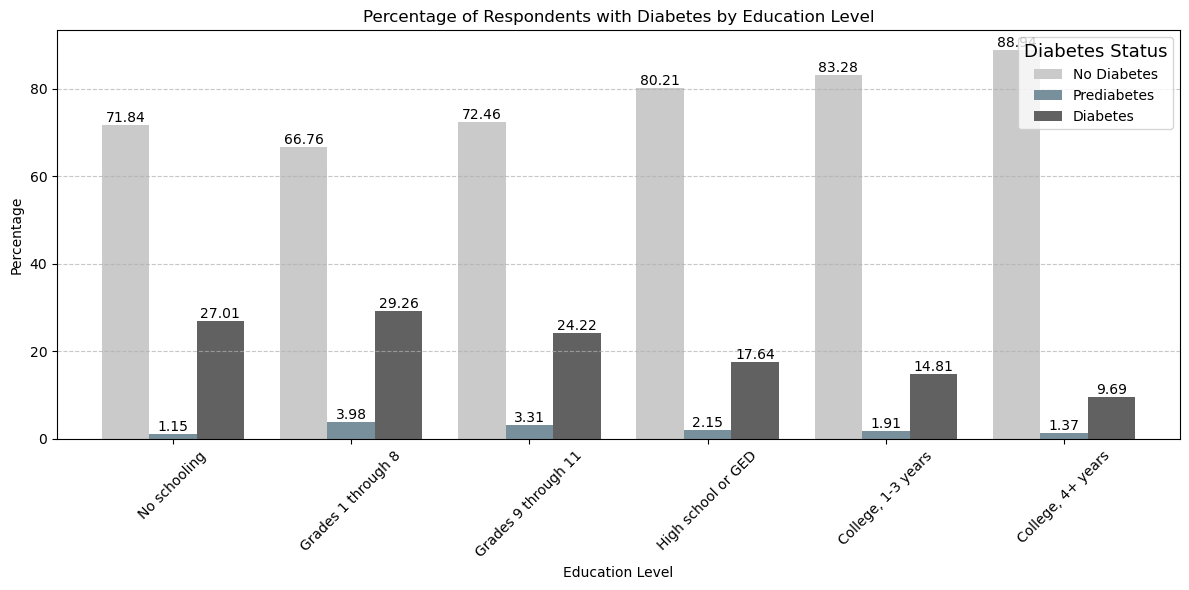

In [13]:
# Group by education and diabetes, count the number of responses in each row
dia_edu = df_trimmed.groupby(["Education", "Diabetes_012"]).size().reset_index(name='count')

# Calculate the sum of responses for each education group
education_group_sum = dia_edu.groupby('Education')['count'].transform('sum')

# Calculate the proportions
dia_edu['proportion'] = (dia_edu['count'] / education_group_sum) * 100

# Pivot the table
edu_pivot_df = dia_edu.pivot(index='Education', columns='Diabetes_012', values='proportion')

# Rename columns for easy display formatting
edu_pivot_df.columns = ['No Diabetes', 'Prediabetes', 'Diabetes']

# Rename indices for easy display formatting
index_mapping = {1.0: 'No schooling',
                 2.0: 'Grades 1 through 8',
                 3.0: 'Grades 9 through 11',
                 4.0: 'High school or GED',
                 5.0: 'College, 1-3 years',
                 6.0: 'College, 4+ years',
                }
edu_pivot_df.index = edu_pivot_df.index.map(index_mapping)

# Plot the table
ax = edu_pivot_df.plot(kind='bar', width = .8, figsize=(12, 6), color=colors)
plt.title('Percentage of Respondents with Diabetes by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(edu_pivot_df.index)), labels=edu_pivot_df.index, rotation=45)
plt.legend(title='Diabetes Status', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the percentages?
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[2], fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.savefig("images/education_vs_diabetes.png")
plt.show()

In [14]:
# Run the Chi-squared test for all education categories
chi2, p, dof, expected = stats.chi2_contingency(edu_pivot_df)

# Output the results
print(f"For all education categories:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

# Filter the dataframe to only the highest and lowest education categories (the greatest difference in proportions)
edu_highlow = edu_pivot_df.loc[["No schooling", "College, 4+ years"]]

# Run the Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(edu_highlow)

# Output the results
print(f"Between highest and lowest education:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

For all education categories:
Chi-squared statistic: 21.35383135918522
p-value: 0.01875700976065913
Degrees of freedom: 10
Expected frequencies:
[[77.24908751  2.31221449 20.43869801]
 [77.24908751  2.31221449 20.43869801]
 [77.24908751  2.31221449 20.43869801]
 [77.24908751  2.31221449 20.43869801]
 [77.24908751  2.31221449 20.43869801]
 [77.24908751  2.31221449 20.43869801]]
The p-value of the chi-sauqred test is 0.0188. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.
Between highest and lowest education:
Chi-squared statistic: 10.01291366913178
p-value: 0.006694581343093912
Degrees of freedom: 2
Expected frequencies:
[[80.38914191  1.2600143  18.3508438 ]
 [80.38914191  1.2600143  18.3508438 ]]
The p-value of the chi-sauqred test is 0.0067. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.


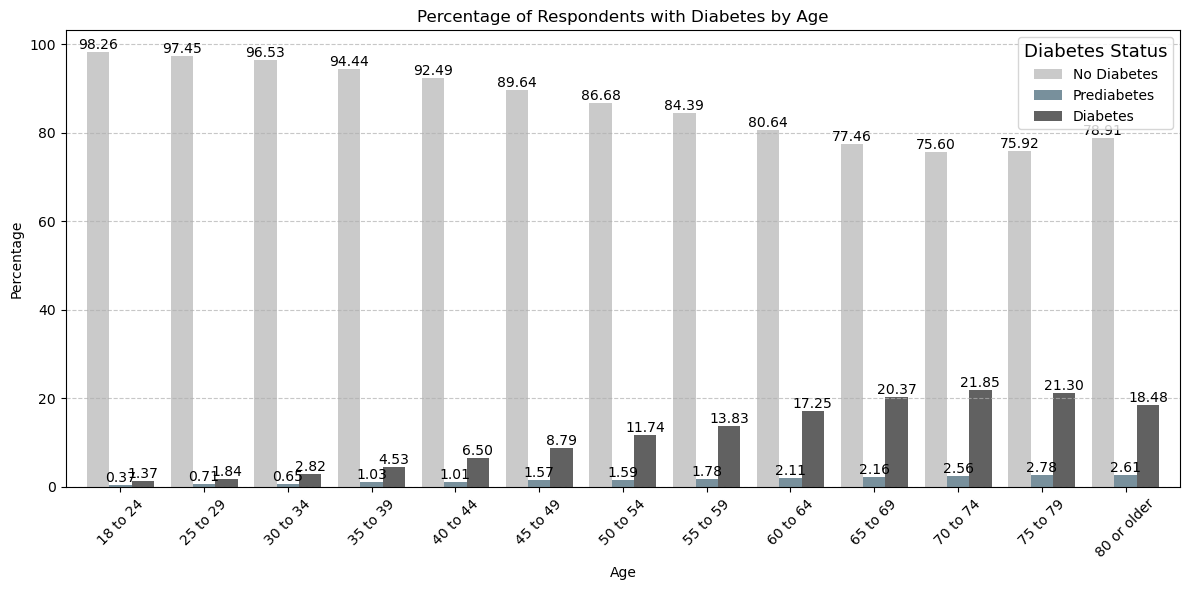

In [15]:
# Group by age and diabetes, count the number of responses in each row
dia_age = df_trimmed.groupby(["Age", "Diabetes_012"]).size().reset_index(name='count')

# Calculate the sum of responses for each age group
age_group_sum = dia_age.groupby('Age')['count'].transform('sum')

# Calculate the proportions
dia_age['proportion'] = (dia_age['count'] / age_group_sum) * 100

# Pivot the table
age_pivot_df = dia_age.pivot(index='Age', columns='Diabetes_012', values='proportion')

# Rename columns for easy display formatting
age_pivot_df.columns = ['No Diabetes', 'Prediabetes', 'Diabetes']

# Rename indices for easy display formatting
index_mapping = {1.0: '18 to 24',
                 2.0: '25 to 29',
                 3.0: '30 to 34',
                 4.0: '35 to 39',
                 5.0: '40 to 44',
                 6.0: '45 to 49',
                 7.0: '50 to 54',
                 8.0: '55 to 59',
                 9.0: '60 to 64',
                 10.0: '65 to 69',
                 11.0: '70 to 74',
                 12.0: '75 to 79',
                 13.0: '80 or older'
                }
age_pivot_df.index = age_pivot_df.index.map(index_mapping)

# Plot the table
ax = age_pivot_df.plot(kind='bar', width = .8, figsize=(12, 6), color=colors)
plt.title('Percentage of Respondents with Diabetes by Age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(age_pivot_df.index)), labels=age_pivot_df.index, rotation=45)
plt.legend(title='Diabetes Status', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the percentages?
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[2], fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.savefig("images/age_vs_diabetes.png")
plt.show()

In [16]:
# Run the Chi-squared test for all age categories
chi2, p, dof, expected = stats.chi2_contingency(age_pivot_df)

# Output the results
print(f"For all age categories:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

# Filter the dataframe to only the highest and lowest education categories (the greatest difference in proportions)
age_highlow = age_pivot_df.loc[["18 to 24", "80 or older"]]

# Run the Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(age_highlow)

# Output the results
print(f"Between highest and lowest age groups:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

For all age categories:
Chi-squared statistic: 77.16008772901847
p-value: 1.7131815735390552e-07
Degrees of freedom: 24
Expected frequencies:
[[86.80037313  1.61059058 11.58903629]
 [86.80037313  1.61059058 11.58903629]
 [86.80037313  1.61059058 11.58903629]
 [86.80037313  1.61059058 11.58903629]
 [86.80037313  1.61059058 11.58903629]
 [86.80037313  1.61059058 11.58903629]
 [86.80037313  1.61059058 11.58903629]
 [86.80037313  1.61059058 11.58903629]
 [86.80037313  1.61059058 11.58903629]
 [86.80037313  1.61059058 11.58903629]
 [86.80037313  1.61059058 11.58903629]
 [86.80037313  1.61059058 11.58903629]
 [86.80037313  1.61059058 11.58903629]]
The p-value of the chi-sauqred test is 0.0. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.
Between highest and lowest age groups:
Chi-squared statistic: 18.554184910797428
p-value: 9.354270804725102e-05
Degrees of freedom: 2
Expected frequencies:
[[88.58616629  1.4887086   9.925125

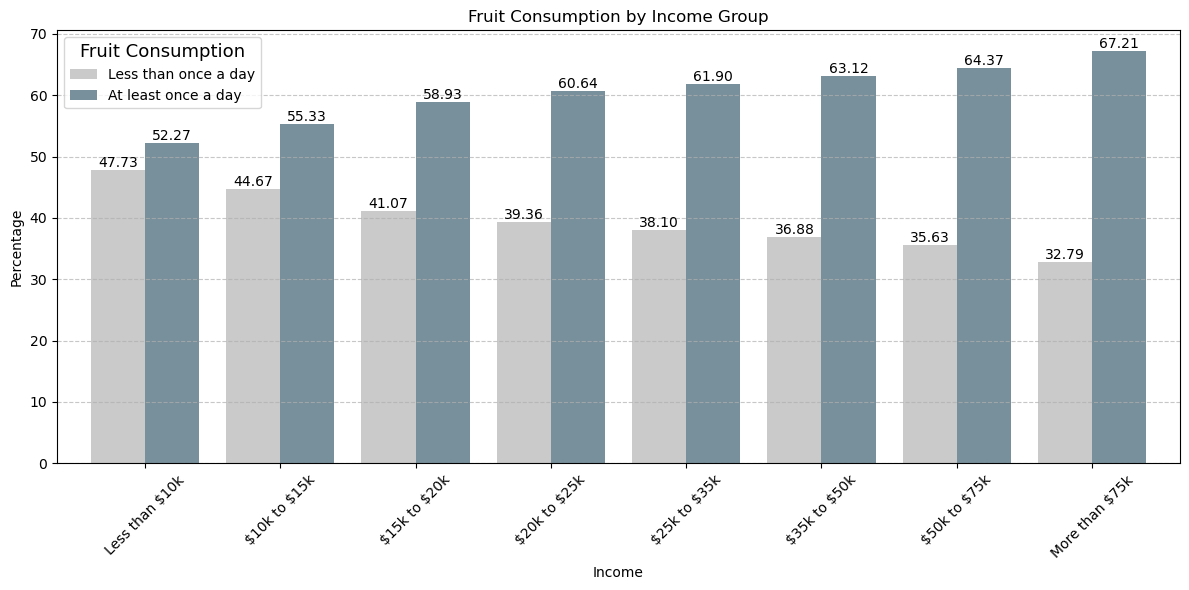

In [17]:
# Group by income and fruits, count the number of responses in each row
income_fruit = df_trimmed.groupby(['Income', 'Fruits']).size().reset_index(name='count')

# Calculate the sum of responses for each income group
incfruit_group_sum = income_fruit.groupby('Income')['count'].transform('sum')

# Calculate the proportions
income_fruit['proportion'] = (income_fruit['count'] / incfruit_group_sum) * 100

# Pivot the table
incfruit_pivot_df = income_fruit.pivot(index='Income', columns='Fruits', values='proportion')

# Rename columns for easy display formatting
incfruit_pivot_df.columns = ['Less than once a day', 'At least once a day']

# Rename indices for easy display formatting
index_mapping = {1.0: 'Less than \$10k',
                 2.0: '\$10k to \$15k',
                 3.0: '\$15k to \$20k',
                 4.0: '\$20k to \$25k',
                 5.0: '\$25k to \$35k',
                 6.0: '\$35k to \$50k',
                 7.0: '\$50k to \$75k',
                 8.0: 'More than \$75k'
                }

incfruit_pivot_df.index = incfruit_pivot_df.index.map(index_mapping)

# Plot the table
ax = incfruit_pivot_df.plot(kind='bar', width = .8, figsize=(12, 6), color=colors)
plt.title('Fruit Consumption by Income Group')
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(incfruit_pivot_df.index)), labels=incfruit_pivot_df.index, rotation=45)
plt.legend(title='Fruit Consumption', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the percentages?
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.savefig("images/income_vs_fruit.png")
plt.show()

In [18]:
# Run the Chi-squared test for all income categories
chi2, p, dof, expected = stats.chi2_contingency(incfruit_pivot_df)

# Output the results
print(f"For all income categories:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

# Filter the dataframe to only the highest and lowest income categories (the greatest difference in proportions)
incfruit_highlow = incfruit_pivot_df.loc[["Less than \$10k", "More than \$75k"]]

# Run the Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(incfruit_highlow)

# Output the results
print(f"For highest and lowest income categories:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

For all income categories:
Chi-squared statistic: 6.943324033558531
p-value: 0.4348047374778161
Degrees of freedom: 7
Expected frequencies:
[[39.52858808 60.47141192]
 [39.52858808 60.47141192]
 [39.52858808 60.47141192]
 [39.52858808 60.47141192]
 [39.52858808 60.47141192]
 [39.52858808 60.47141192]
 [39.52858808 60.47141192]
 [39.52858808 60.47141192]]
The p-value of the chi-sauqred test is 0.4348. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.
For highest and lowest income categories:
Chi-squared statistic: 4.043770789078317
p-value: 0.044334654971304524
Degrees of freedom: 1
Expected frequencies:
[[40.25872235 59.74127765]
 [40.25872235 59.74127765]]
The p-value of the chi-sauqred test is 0.0443. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.


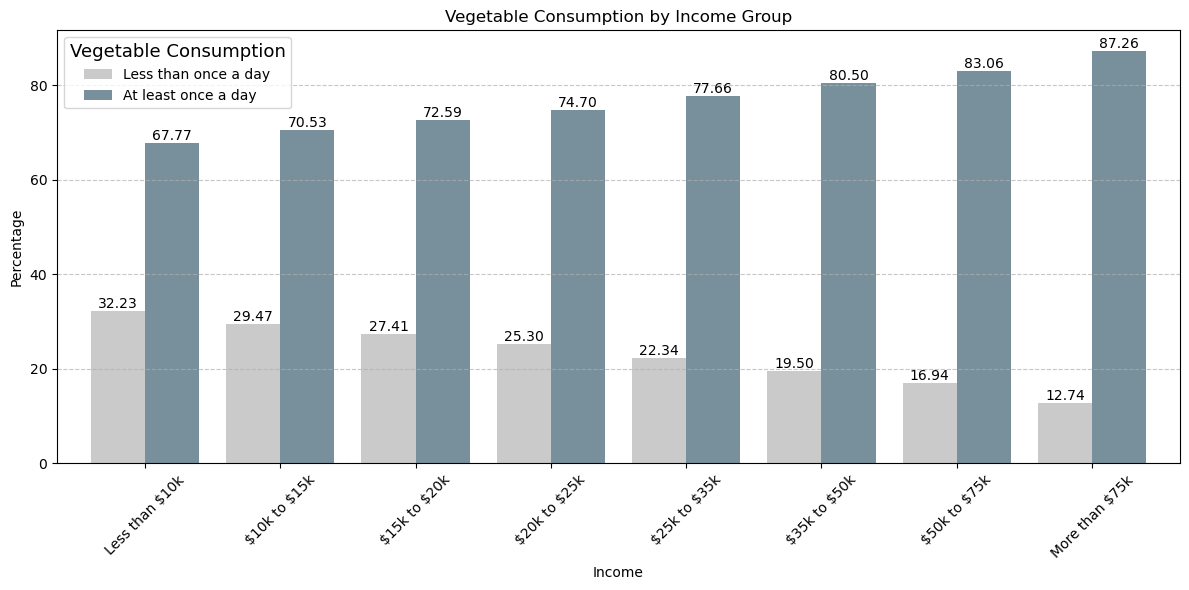

In [19]:
# Group by income and veggies, count the number of responses in each row
income_veg = df_trimmed.groupby(['Income', 'Veggies']).size().reset_index(name='count')

# Calculate the sum of responses for each income group
incveg_group_sum = income_veg.groupby('Income')['count'].transform('sum')

# Calculate the proportions
income_veg['proportion'] = (income_veg['count'] / incveg_group_sum) * 100

# Pivot the table
incveg_pivot_df = income_veg.pivot(index='Income', columns='Veggies', values='proportion')

# Rename columns for easy display formatting
incveg_pivot_df.columns = ['Less than once a day', 'At least once a day']

# Rename indices for easy display formatting
index_mapping = {1.0: 'Less than \$10k',
                 2.0: '\$10k to \$15k',
                 3.0: '\$15k to \$20k',
                 4.0: '\$20k to \$25k',
                 5.0: '\$25k to \$35k',
                 6.0: '\$35k to \$50k',
                 7.0: '\$50k to \$75k',
                 8.0: 'More than \$75k'
                }

incveg_pivot_df.index = incveg_pivot_df.index.map(index_mapping)

# Plot the table
ax = incveg_pivot_df.plot(kind='bar', width = .8, figsize=(12, 6), color=colors)
plt.title('Vegetable Consumption by Income Group')
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(incveg_pivot_df.index)), labels=incveg_pivot_df.index, rotation=45)
plt.legend(title='Vegetable Consumption', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the percentages?
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.savefig("images/income_vs_veg.png")
plt.show()

In [20]:
# Run the Chi-squared test for all income categories
chi2, p, dof, expected = stats.chi2_contingency(incveg_pivot_df)

# Output the results
print(f"For all income categories:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

# Filter the dataframe to only the highest and lowest income categories (the greatest difference in proportions)
incveg_highlow = incveg_pivot_df.loc[["Less than \$10k", "More than \$75k"]]

# Run the Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(incveg_highlow)

# Output the results
print(f"For highest and lowest income categories:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

For all income categories:
Chi-squared statistic: 17.155200073689883
p-value: 0.01642237116179022
Degrees of freedom: 7
Expected frequencies:
[[23.24007703 76.75992297]
 [23.24007703 76.75992297]
 [23.24007703 76.75992297]
 [23.24007703 76.75992297]
 [23.24007703 76.75992297]
 [23.24007703 76.75992297]
 [23.24007703 76.75992297]
 [23.24007703 76.75992297]]
The p-value of the chi-sauqred test is 0.0164. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.
For highest and lowest income categories:
Chi-squared statistic: 9.809623435431151
p-value: 0.0017360104844295042
Degrees of freedom: 1
Expected frequencies:
[[22.4834318 77.5165682]
 [22.4834318 77.5165682]]
The p-value of the chi-sauqred test is 0.0017. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.


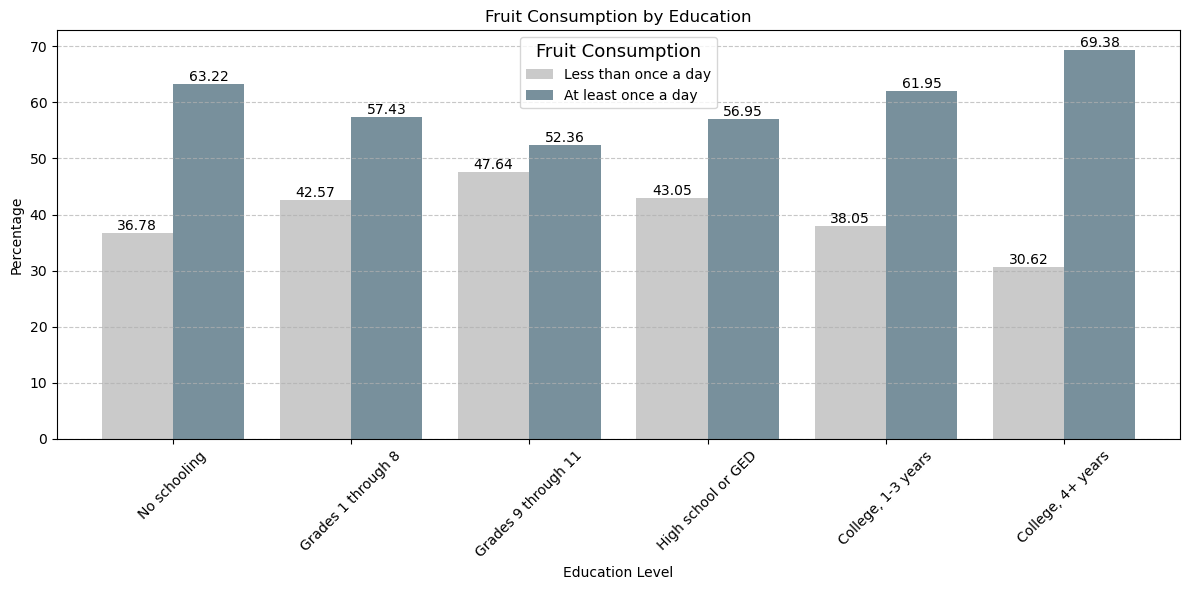

In [21]:
# Group by education and fruits, count the number of responses in each row
edu_fruit = df_trimmed.groupby(['Education', 'Fruits']).size().reset_index(name='count')

# Calculate the sum of responses for each education group
edufruit_group_sum = edu_fruit.groupby('Education')['count'].transform('sum')

# Calculate the proportions
edu_fruit['proportion'] = (edu_fruit['count'] / edufruit_group_sum) * 100

# Pivot the table
edufruit_pivot_df = edu_fruit.pivot(index='Education', columns='Fruits', values='proportion')

# Rename columns for easy display formatting
edufruit_pivot_df.columns = ['Less than once a day', 'At least once a day']

# Rename indices for easy display formatting
index_mapping = {1.0: 'No schooling',
                 2.0: 'Grades 1 through 8',
                 3.0: 'Grades 9 through 11',
                 4.0: 'High school or GED',
                 5.0: 'College, 1-3 years',
                 6.0: 'College, 4+ years',
                }

edufruit_pivot_df.index = edufruit_pivot_df.index.map(index_mapping)

# Plot the table
ax = edufruit_pivot_df.plot(kind='bar', width = .8, figsize=(12, 6), color=colors)
plt.title('Fruit Consumption by Education')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(edufruit_pivot_df.index)), labels=edufruit_pivot_df.index, rotation=45)
plt.legend(title='Fruit Consumption', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the percentages?
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.savefig("images/education_vs_fruit.png")
plt.show()

In [22]:
# Run the Chi-squared test for all education categories
chi2, p, dof, expected = stats.chi2_contingency(edufruit_pivot_df)

# Output the results
print(f"For all education categories:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

# Filter the dataframe to only the highest and lowest education categories (the greatest difference in proportions)
edufruit_highlow = edufruit_pivot_df.loc[["Grades 9 through 11", "College, 4+ years"]]

# Run the Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(edufruit_highlow)

# Output the results
print(f"For the highest and lowest education categories:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

For all education categories:
Chi-squared statistic: 7.344563181979858
p-value: 0.19624976011684742
Degrees of freedom: 5
Expected frequencies:
[[39.7848349 60.2151651]
 [39.7848349 60.2151651]
 [39.7848349 60.2151651]
 [39.7848349 60.2151651]
 [39.7848349 60.2151651]
 [39.7848349 60.2151651]]
The p-value of the chi-sauqred test is 0.1962. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.
For the highest and lowest education categories:
Chi-squared statistic: 5.381948848273726
p-value: 0.020346137867177632
Degrees of freedom: 1
Expected frequencies:
[[39.13068507 60.86931493]
 [39.13068507 60.86931493]]
The p-value of the chi-sauqred test is 0.0203. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.


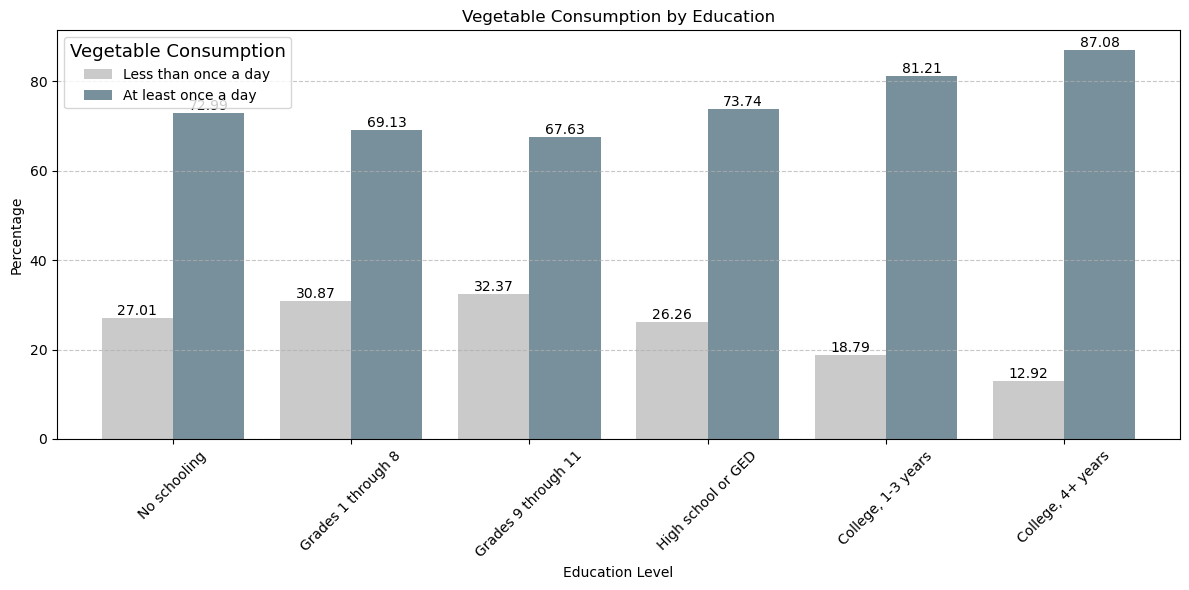

In [23]:
# Group by education and veggies, count the number of responses in each row
edu_veg = df_trimmed.groupby(['Education', 'Veggies']).size().reset_index(name='count')

# Calculate the sum of responses for each education group
eduveg_group_sum = edu_veg.groupby('Education')['count'].transform('sum')

# Calculate the proportions
edu_veg['proportion'] = (edu_veg['count'] / eduveg_group_sum) * 100

# Pivot the table
eduveg_pivot_df = edu_veg.pivot(index='Education', columns='Veggies', values='proportion')

# Rename columns for easy display formatting
eduveg_pivot_df.columns = ['Less than once a day', 'At least once a day']

# Rename indices for easy display formatting
index_mapping = {1.0: 'No schooling',
                 2.0: 'Grades 1 through 8',
                 3.0: 'Grades 9 through 11',
                 4.0: 'High school or GED',
                 5.0: 'College, 1-3 years',
                 6.0: 'College, 4+ years',
                }

eduveg_pivot_df.index = eduveg_pivot_df.index.map(index_mapping)

# Plot the table
ax = eduveg_pivot_df.plot(kind='bar', width = .8, figsize=(12, 6), color=colors)
plt.title('Vegetable Consumption by Education')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(eduveg_pivot_df.index)), labels=eduveg_pivot_df.index, rotation=45)
plt.legend(title='Vegetable Consumption', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the percentages?
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.savefig("images/education_vs_veg.png")
plt.show()

In [24]:
# Run the Chi-squared test for all education categories
chi2, p, dof, expected = stats.chi2_contingency(eduveg_pivot_df)

# Output the results
print(f"For all education categories:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

# Filter the dataframe to only the highest and lowest education categories (the greatest difference in proportions)
eduveg_highlow = eduveg_pivot_df.loc[["Grades 9 through 11", "College, 4+ years"]]

# Run the Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(eduveg_highlow)

# Output the results
print(f"Between the highest and lowest education categories:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

For all education categories:
Chi-squared statistic: 14.969646834207571
p-value: 0.01049282266135244
Degrees of freedom: 5
Expected frequencies:
[[24.70248383 75.29751617]
 [24.70248383 75.29751617]
 [24.70248383 75.29751617]
 [24.70248383 75.29751617]
 [24.70248383 75.29751617]
 [24.70248383 75.29751617]]
The p-value of the chi-sauqred test is 0.0105. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.
Between the highest and lowest education categories:
Chi-squared statistic: 9.720982523965885
p-value: 0.0018217610042258775
Degrees of freedom: 1
Expected frequencies:
[[22.64280393 77.35719607]
 [22.64280393 77.35719607]]
The p-value of the chi-sauqred test is 0.0018. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.


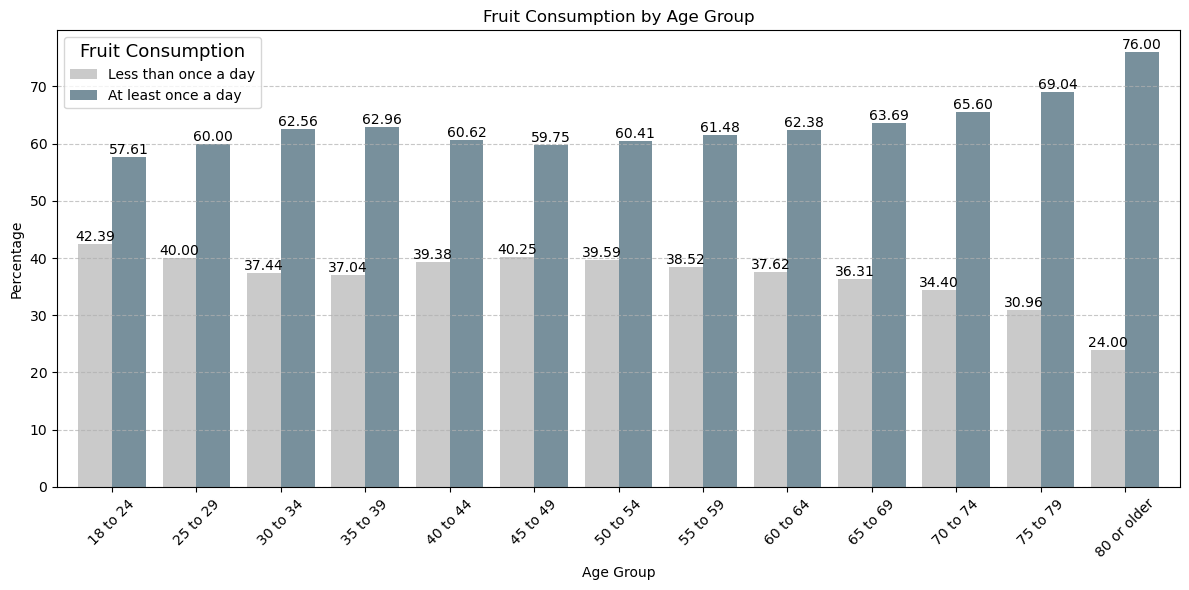

In [25]:
# Group by age and fruits, count the number of responses in each row
age_fruit = df_trimmed.groupby(['Age', 'Fruits']).size().reset_index(name='count')

# Calculate the sum of responses for each age group
agefruit_group_sum = age_fruit.groupby('Age')['count'].transform('sum')

# Calculate the proportions
age_fruit['proportion'] = (age_fruit['count'] / agefruit_group_sum) * 100

# Pivot the table
agefruit_pivot_df = age_fruit.pivot(index='Age', columns='Fruits', values='proportion')

# Rename columns for easy display formatting
agefruit_pivot_df.columns = ['Less than once a day', 'At least once a day']

# Rename indices for easy display formatting
index_mapping = {1.0: '18 to 24',
                 2.0: '25 to 29',
                 3.0: '30 to 34',
                 4.0: '35 to 39',
                 5.0: '40 to 44',
                 6.0: '45 to 49',
                 7.0: '50 to 54',
                 8.0: '55 to 59',
                 9.0: '60 to 64',
                 10.0: '65 to 69',
                 11.0: '70 to 74',
                 12.0: '75 to 79',
                 13.0: '80 or older'
                }

agefruit_pivot_df.index = agefruit_pivot_df.index.map(index_mapping)

# Plot the table
ax = agefruit_pivot_df.plot(kind='bar', width = .8, figsize=(12, 6), color=colors)
plt.title('Fruit Consumption by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(agefruit_pivot_df.index)), labels=agefruit_pivot_df.index, rotation=45)
plt.legend(title='Fruit Consumption', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the percentages?
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.savefig("images/age_vs_fruit.png")
plt.show()

In [26]:
# Run the Chi-squared test for all age categories
chi2, p, dof, expected = stats.chi2_contingency(agefruit_pivot_df)

# Output the results
print(f"For all age categories:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

# Filter the dataframe to only the highest and lowest age categories (the greatest difference in proportions)
agefruit_highlow = agefruit_pivot_df.loc[["18 to 24", "80 or older"]]

# Run the Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(agefruit_highlow)

# Output the results
print(f"For highest and lowest age categories:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

For all age categories:
Chi-squared statistic: 11.865410849438652
p-value: 0.45654840162539
Degrees of freedom: 12
Expected frequencies:
[[36.76145179 63.23854821]
 [36.76145179 63.23854821]
 [36.76145179 63.23854821]
 [36.76145179 63.23854821]
 [36.76145179 63.23854821]
 [36.76145179 63.23854821]
 [36.76145179 63.23854821]
 [36.76145179 63.23854821]
 [36.76145179 63.23854821]
 [36.76145179 63.23854821]
 [36.76145179 63.23854821]
 [36.76145179 63.23854821]
 [36.76145179 63.23854821]]
The p-value of the chi-sauqred test is 0.4565. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.
For highest and lowest age categories:
Chi-squared statistic: 6.816101419067264
p-value: 0.009033956792275233
Degrees of freedom: 1
Expected frequencies:
[[33.19263689 66.80736311]
 [33.19263689 66.80736311]]
The p-value of the chi-sauqred test is 0.009. As this value is less than 0.05, we reject the null hypothesis. The samples are

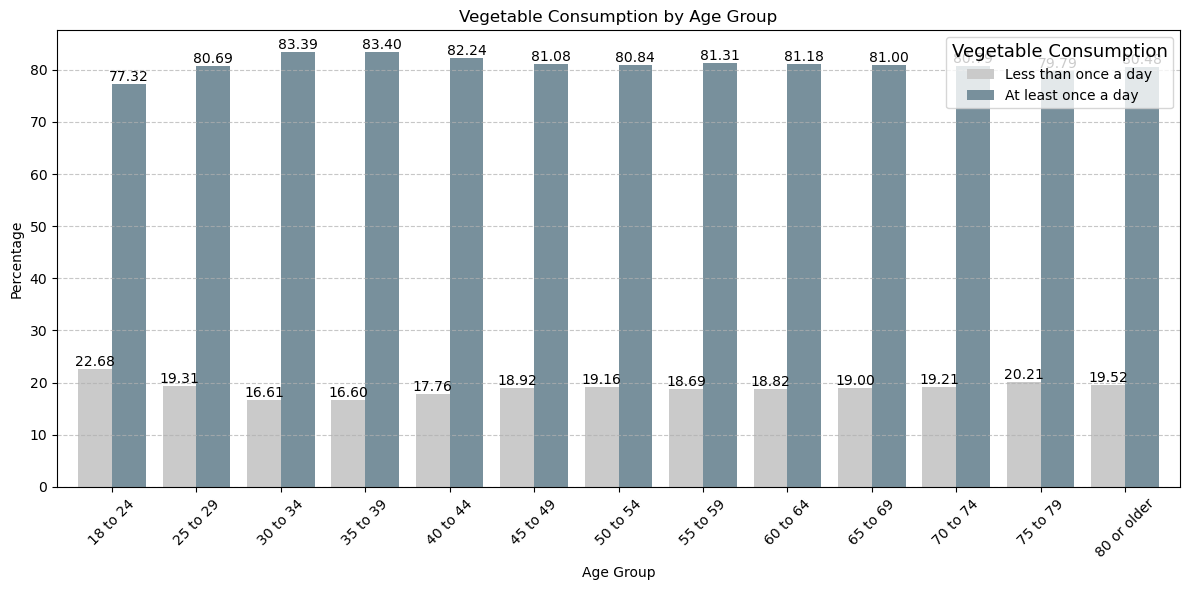

In [27]:
# Group by age and fruits, count the number of responses in each row
age_veg = df_trimmed.groupby(['Age', 'Veggies']).size().reset_index(name='count')

# Calculate the sum of responses for each age group
ageveg_group_sum = age_veg.groupby('Age')['count'].transform('sum')

# Calculate the proportions
age_veg['proportion'] = (age_veg['count'] / ageveg_group_sum) * 100

# Pivot the table
ageveg_pivot_df = age_veg.pivot(index='Age', columns='Veggies', values='proportion')

# Rename columns for easy display formatting
ageveg_pivot_df.columns = ['Less than once a day', 'At least once a day']

# Rename indices for easy display formatting
index_mapping = {1.0: '18 to 24',
                 2.0: '25 to 29',
                 3.0: '30 to 34',
                 4.0: '35 to 39',
                 5.0: '40 to 44',
                 6.0: '45 to 49',
                 7.0: '50 to 54',
                 8.0: '55 to 59',
                 9.0: '60 to 64',
                 10.0: '65 to 69',
                 11.0: '70 to 74',
                 12.0: '75 to 79',
                 13.0: '80 or older'
                }

ageveg_pivot_df.index = ageveg_pivot_df.index.map(index_mapping)

# Plot the table
ax = ageveg_pivot_df.plot(kind='bar', width = .8, figsize=(12, 6), color=colors)
plt.title('Vegetable Consumption by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(ageveg_pivot_df.index)), labels=ageveg_pivot_df.index, rotation=45)
plt.legend(title='Vegetable Consumption', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the percentages?
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.savefig("images/age_vs_veg.png")
plt.show()

In [28]:
# Run the Chi-squared test for all age categories
chi2, p, dof, expected = stats.chi2_contingency(ageveg_pivot_df)

# Output the results
print(f"For all age categories:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

# Filter the dataframe to only the highest and lowest education categories (the greatest difference in proportions)
ageveg_highlow = agefruit_pivot_df.loc[["18 to 24", "80 or older"]]

# Run the Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(agefruit_highlow)

# Output the results
print(f"For highest and lowest age categories:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p > 0.05:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.")
else:
    print(f"The p-value of the chi-sauqred test is {round(p, 4)}. As this value is less than 0.05, we reject the null hypothesis. The samples are therefore statistically different.")

For all age categories:
Chi-squared statistic: 1.8611684411465403
p-value: 0.9995909140538747
Degrees of freedom: 12
Expected frequencies:
[[18.96055451 81.03944549]
 [18.96055451 81.03944549]
 [18.96055451 81.03944549]
 [18.96055451 81.03944549]
 [18.96055451 81.03944549]
 [18.96055451 81.03944549]
 [18.96055451 81.03944549]
 [18.96055451 81.03944549]
 [18.96055451 81.03944549]
 [18.96055451 81.03944549]
 [18.96055451 81.03944549]
 [18.96055451 81.03944549]
 [18.96055451 81.03944549]]
The p-value of the chi-sauqred test is 0.9996. As this value is greater than 0.05, we fail to reject the null hypothesis. The samples are therefore not statistically different.
For highest and lowest age categories:
Chi-squared statistic: 6.816101419067264
p-value: 0.009033956792275233
Degrees of freedom: 1
Expected frequencies:
[[33.19263689 66.80736311]
 [33.19263689 66.80736311]]
The p-value of the chi-sauqred test is 0.009. As this value is less than 0.05, we reject the null hypothesis. The samples a

## Chinna

In [30]:
# Group by PhysActivity and diabetes status, count the number of participants for each category
dia_PhysActivity = df_trimmed.groupby(["PhysActivity", "Diabetes_012"]).size().reset_index(name='count')


# Separate 0 PhysActivity values from 1 PhysActivity values, copying the tables so we can easily perform actions on them
no_PhysActivity = dia_PhysActivity[dia_PhysActivity["PhysActivity"] == 0].copy()
yes_PhysActivity = dia_PhysActivity[dia_PhysActivity["PhysActivity"] == 1].copy()

# Find the total respondents per category (PhysActivity and no PhysActivity)
# Create a new column for the proportion of respondents in each row out of their respective category
no_PhysActivity_sum = no_PhysActivity["count"].sum()
no_PhysActivity["proportion"] = (no_PhysActivity["count"] / no_PhysActivity_sum) * 100

yes_PhysActivity_sum = yes_PhysActivity["count"].sum()
yes_PhysActivity["proportion"] = (yes_PhysActivity["count"] / yes_PhysActivity_sum) * 100

# Using the pd.concat() function, combine the two tables into the new PhysActivity df, which shows the proportions
PhysActivitystack = pd.concat([no_PhysActivity, yes_PhysActivity], ignore_index=False)
PhysActivitystack

,PhysActivity,Diabetes_012,count,proportion
0,0.0,0.0,47212,76.444301
1,0.0,1.0,1489,2.410946
2,0.0,2.0,13059,21.144754
3,1.0,0.0,166491,86.750208
4,1.0,1.0,3142,1.637140
5,1.0,2.0,22287,11.612651


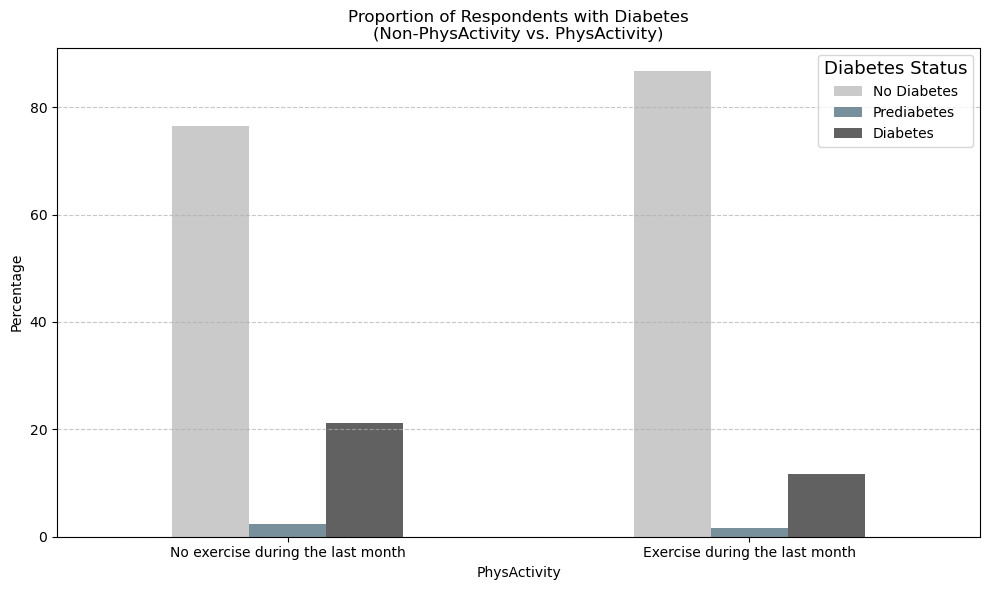

In [31]:
# Set up pivot table to reorganize PhysActivity df
PhysActivity_pivot_df = PhysActivitystack.pivot(index='PhysActivity', columns='Diabetes_012', values='proportion')

# Rename columns for easy display formatting
PhysActivity_pivot_df.columns = ['No Diabetes', 'Prediabetes', 'Diabetes']

# Rename indices for easy display formatting
index_mapping = {0.0: 'No exercise during the last month', 1.0: 'Exercise during the last month'}
PhysActivity_pivot_df.index = PhysActivity_pivot_df.index.map(index_mapping)

# Plot the table
colors = ['#CACACA','#78909C','#616161']
PhysActivity_pivot_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Proportion of Respondents with Diabetes\n(Non-PhysActivity vs. PhysActivity)')
plt.xlabel('PhysActivity')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(PhysActivity_pivot_df.index)), labels=PhysActivity_pivot_df.index, rotation=0)
plt.legend(title='Diabetes Status', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

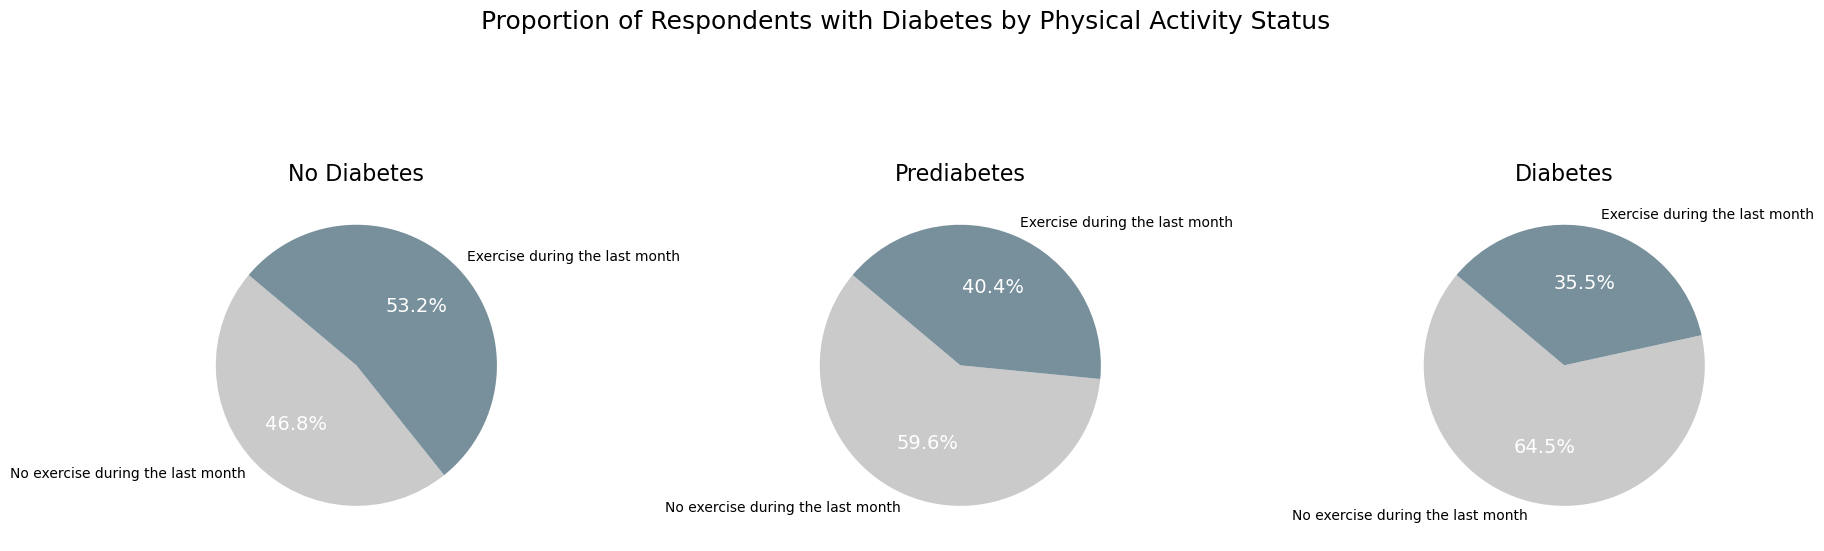

In [32]:

# PhysActivity Pie Chart

fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Define colors
colors = ['#CACACA','#78909C','#616161']

for i, column in enumerate(PhysActivity_pivot_df.columns):
    wedges, texts, autotexts = axes[i].pie(
        PhysActivity_pivot_df[column],
        labels=PhysActivity_pivot_df.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors[:len(PhysActivity_pivot_df.index)]  # Adjust colors to match number of slices
    )
    axes[i].set_title(column, fontsize=16, color='black')  # Title font size and color

    # Adjust font size and color for pie chart labels and percentages
    for text in texts:
        text.set_fontsize(10)
        text.set_color('black')  # Set color of pie chart labels
    for autotext in autotexts:
        autotext.set_fontsize(14)
        autotext.set_color('white')  # Set color of percentages

plt.suptitle('Proportion of Respondents with Diabetes by Physical Activity Status', fontsize=18)


plt.tight_layout()
plt.savefig("images/dia_vs_physactivity.png")
plt.show()


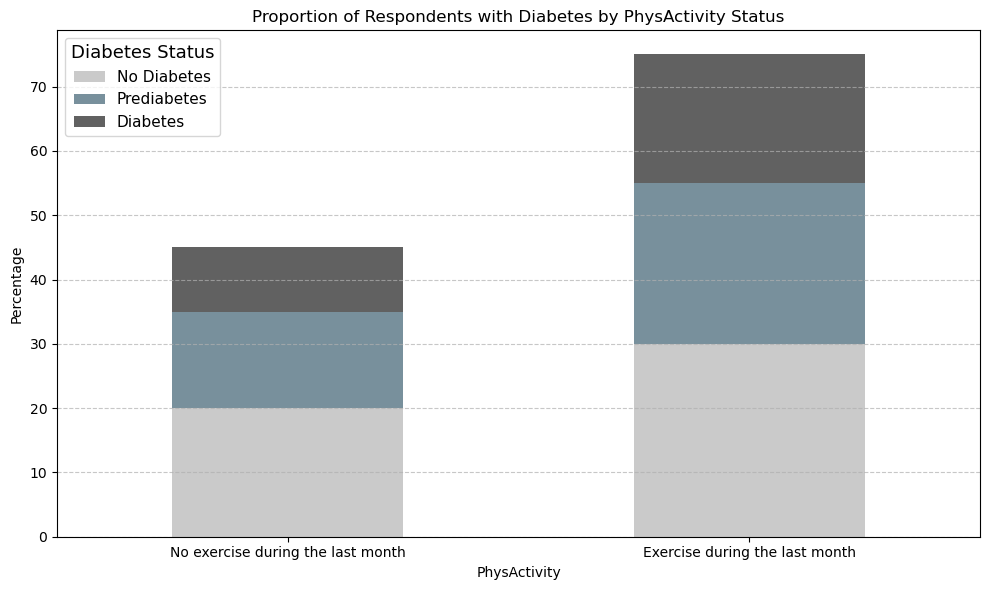

In [33]:
#stacked bar chart PhysActivity

#stacked bar chart PhysActivity
data = {
    'No Diabetes': [20, 30],
    'Prediabetes': [15, 25],
    'Diabetes': [10, 20]
}
PhysActivity_pivot_df = pd.DataFrame(data, index=['No exercise during the last month', 'Exercise during the last month'])

# Define colors for each segment
colors = ['#CACACA','#78909C','#616161']

# Plotting the stacked bar chart
ax = PhysActivity_pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Customize the chart
plt.title('Proportion of Respondents with Diabetes by PhysActivity Status')
plt.xlabel('PhysActivity')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(PhysActivity_pivot_df.index)), labels=PhysActivity_pivot_df.index, rotation=0)
plt.legend(title='Diabetes Status', title_fontsize='13', fontsize='11')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("images/dia_vs_physactivity_pie.png")
# Show the plot
plt.show()

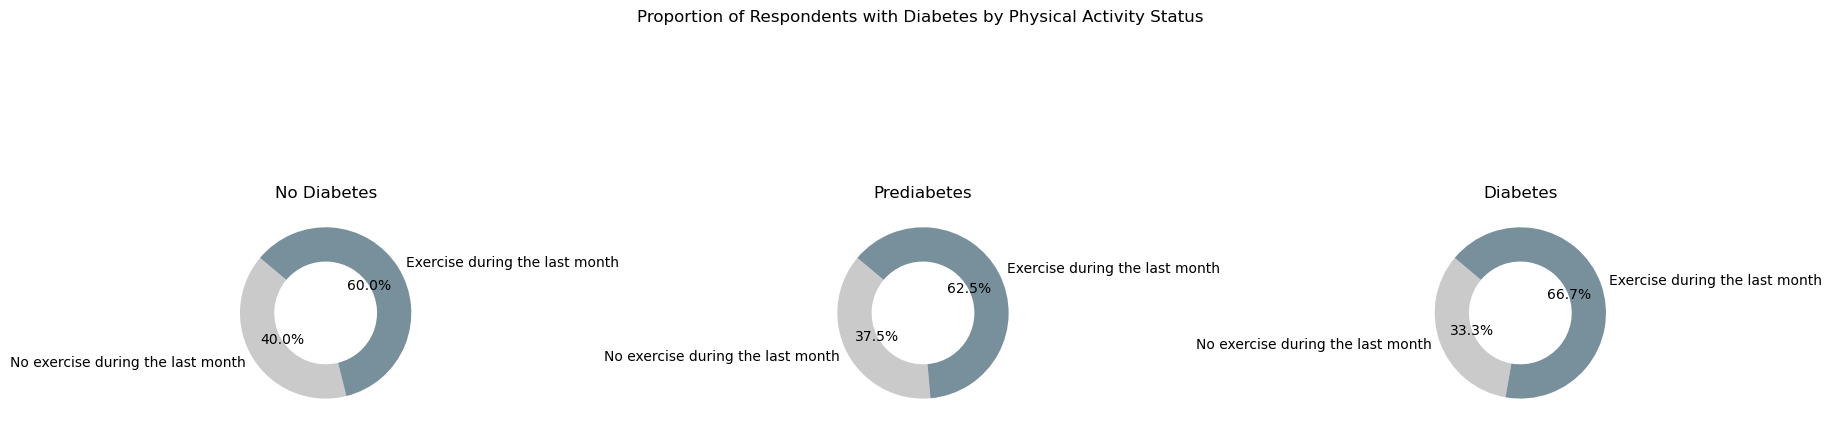

In [34]:
#Doughnut Chart 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = ['#CACACA','#78909C','#616161']
for i, column in enumerate(PhysActivity_pivot_df.columns):
    wedges, texts, autotexts = axes[i].pie(PhysActivity_pivot_df[column], labels=PhysActivity_pivot_df.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4), colors=colors)
    axes[i].set_title(column)

plt.suptitle('Proportion of Respondents with Diabetes by Physical Activity Status')
plt.tight_layout()
plt.savefig("images/dia_vs_physactivity_bar.png")
plt.show()

In [35]:
#Chi square solution PhysActivity

# Example data for demonstration
data = {
    'PhysActivity': ['No exercise during the last month', 'Exercise during the last month'],
    'No Diabetes': [50, 30],
    'Prediabetes': [20, 15],
    'Diabetes': [10, 25]
}

PhysActivitystack = pd.DataFrame(data)
PhysActivitystack.set_index('PhysActivity', inplace=True)


from scipy.stats import chi2_contingency

# Prepare contingency table for Chi-Square test
contingency_table01 = PhysActivitystack.T  # Transpose to get counts in columns

contingency_table01



PhysActivity,No exercise during the last month,Exercise during the last month
No Diabetes,50,30
Prediabetes,20,15
Diabetes,10,25


In [36]:
# Perform Chi-Square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table01)

# Output the results
print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-Value: {p_val}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(ex)
if p_val > 0.05:
    print(f"The p-value of the chi-squared test is {round(p_val,4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. The two samples are therefore not statistically different.")
else:
        print(f"The p-value of the chi-squared test is {round(p_val,4)}. As this value is less than 0.05, we reject the null hypothesis. The two samples are therefore statistically different.")

Chi-Square Statistic: 11.52742346938776
P-Value: 0.0031394371877609584
Degrees of Freedom: 2
Expected Frequencies:
[[42.66666667 37.33333333]
 [18.66666667 16.33333333]
 [18.66666667 16.33333333]]
The p-value of the chi-squared test is 0.0031. As this value is less than 0.05, we reject the null hypothesis. The two samples are therefore statistically different.


In [37]:
#Fixed Chi-Square test/ updated percentage to correct count value.


# Create a contingency table
contingency_table02 = pd.crosstab(df_trimmed['Diabetes_012'], df_trimmed['PhysActivity'])

#Rename Column and Row Labels:
contingency_table02.columns = ['No exercise during the last month', 'Exercise during the last month']
contingency_table02.index = ['No Diabetes', 'Prediabetes', 'Diabetes']

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table01)

# Print results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation of results

if p_value < 0.05:
    print(f"The p-value of the chi-squared test is {round(p_value,4)}. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Diabetes Status.")
else:
    print(f"The p-value of the chi-squared test is {round(p_value,4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. There is no significant association between Physical Activity and Diabetes Status.")

contingency_table02



Chi-Square Statistic: 11.52742346938776
P-Value: 0.0031394371877609584
Degrees of Freedom: 2
Expected Frequencies Table:
[[42.66666667 37.33333333]
 [18.66666667 16.33333333]
 [18.66666667 16.33333333]]
The p-value of the chi-squared test is 0.0031. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Diabetes Status.


,No exercise during the last month,Exercise during the last month
No Diabetes,47212,166491
Prediabetes,1489,3142
Diabetes,13059,22287


In [38]:
#PhysActivity to Income
# Group by PhysActivity and Income, count the number of participants for each category
dia_PhysActivity_Income = df_trimmed.groupby(["PhysActivity", "Income"]).size().reset_index(name='count')


# Separate 0 PhysActivity values from 1 PhysActivity values, copying the tables so we can easily perform actions on them
no_PhysActivity_Income = dia_PhysActivity_Income[dia_PhysActivity_Income["PhysActivity"] == 0].copy()
yes_PhysActivity_Income = dia_PhysActivity_Income[dia_PhysActivity_Income["PhysActivity"] == 1].copy()

# Find the total respondents per category (PhysActivity and no PhysActivity)
# Create a new column for the proportion of respondents in each row out of their respective category
no_PhysActivity_sum_Income = no_PhysActivity_Income["count"].sum()
no_PhysActivity_Income["proportion"] = (no_PhysActivity_Income["count"] / no_PhysActivity_sum_Income) * 100

yes_PhysActivity_sum_Income = yes_PhysActivity_Income["count"].sum()
yes_PhysActivity_Income["proportion"] = (yes_PhysActivity_Income["count"] / yes_PhysActivity_sum_Income) * 100

# Using the pd.concat() function, combine the two tables into the new PhysActivity df, which shows the proportions
PhysActivitystack_Income = pd.concat([no_PhysActivity_Income, yes_PhysActivity_Income], ignore_index=False)
PhysActivitystack_Income





,PhysActivity,Income,count,proportion
0,0.0,1.0,3892,6.301813
1,0.0,2.0,4699,7.608484
2,0.0,3.0,5941,9.619495
3,0.0,4.0,6889,11.154469
4,0.0,5.0,7865,12.734780
5,0.0,6.0,9638,15.605570
6,0.0,7.0,9391,15.205635
7,0.0,8.0,13445,21.769754
8,1.0,1.0,5919,3.084098
9,1.0,2.0,7084,3.691121


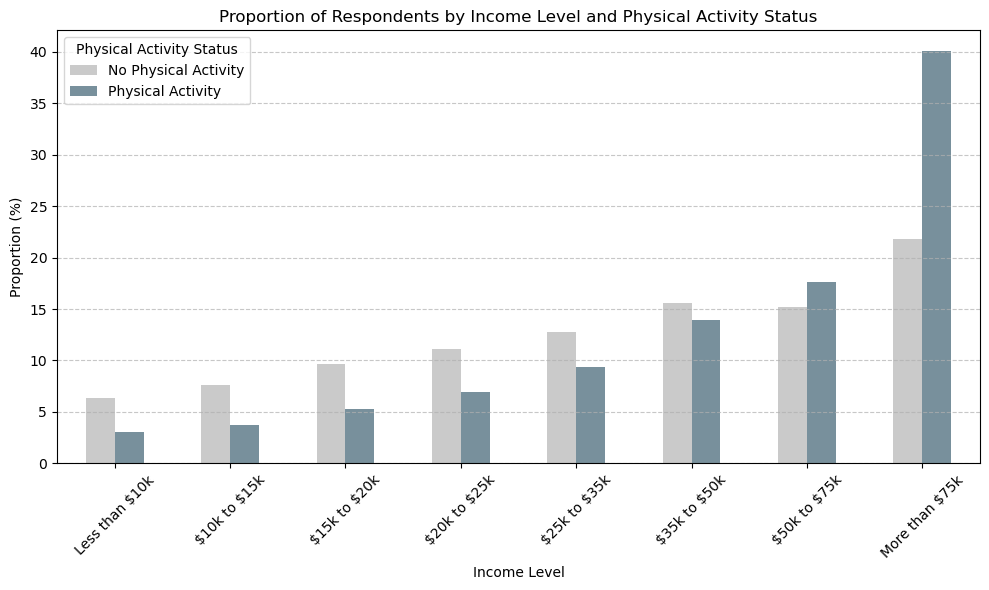

In [39]:
PhysActivity_pivot_Income = PhysActivitystack_Income.pivot(index='Income', columns='PhysActivity', values='proportion')
colors = ['#CACACA','#78909C','#616161']
# Rename columns for clarity
PhysActivity_pivot_Income.columns = ['No Physical Activity', 'Physical Activity']

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
PhysActivity_pivot_Income.plot(kind='bar', ax=ax, color=['#CACACA', '#78909c'])

# Formatting
plt.title('Proportion of Respondents by Income Level and Physical Activity Status')
plt.xlabel('Income Level')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)  # Rotate x labels to horizontal
ax.set_xticklabels(['Less than \$10k', '\$10k to \$15k', '\$15k to \$20k', '\$20k to \$25k', '\$25k to \$35k', '\$35k to \$50k', '\$50k to \$75k', 'More than \$75k'], rotation=45)
plt.legend(title='Physical Activity Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [40]:
#PhysActivity to Age
# Group by PhysActivity and Age, count the number of participants for each category
dia_PhysActivity_Age = df_trimmed.groupby(["PhysActivity", "Age"]).size().reset_index(name='count')


# Separate 0 PhysActivity values from 1 PhysActivity values, copying the tables so we can easily perform actions on them
no_PhysActivity_Age = dia_PhysActivity_Age[dia_PhysActivity_Age["PhysActivity"] == 0].copy()
yes_PhysActivity_Age = dia_PhysActivity_Age[dia_PhysActivity_Age["PhysActivity"] == 1].copy()

# Find the total respondents per category (PhysActivity and no PhysActivity)
# Create a new column for the proportion of respondents in each row out of their respective category
no_PhysActivity_sum_Age = no_PhysActivity_Age["count"].sum()
no_PhysActivity_Age["proportion"] = (no_PhysActivity_Age["count"] / no_PhysActivity_sum_Age) * 100

yes_PhysActivity_sum_Age = yes_PhysActivity_Age["count"].sum()
yes_PhysActivity_Age["proportion"] = (yes_PhysActivity_Age["count"] / yes_PhysActivity_sum_Age) * 100

# Using the pd.concat() function, combine the two tables into the new PhysActivity df, which shows the proportions
PhysActivitystack_Age = pd.concat([no_PhysActivity_Age, yes_PhysActivity_Age], ignore_index=False)
PhysActivitystack_Age



,PhysActivity,Age,count,proportion
0,0.0,1.0,749,1.212759
1,0.0,2.0,1185,1.918718
2,0.0,3.0,1952,3.160622
3,0.0,4.0,2759,4.467293
4,0.0,5.0,3385,5.480894
5,0.0,6.0,4451,7.206930
6,0.0,7.0,6380,10.330311
7,0.0,8.0,7707,12.478951
8,0.0,9.0,8357,13.531412
9,0.0,10.0,7956,12.882124


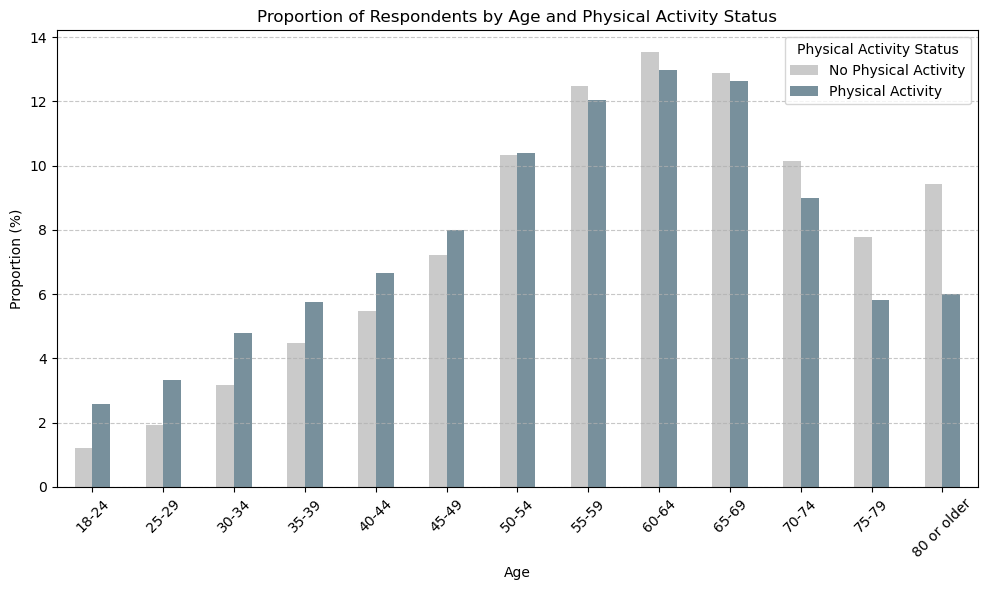

In [41]:
PhysActivity_pivot_Age = PhysActivitystack_Age.pivot(index='Age', columns='PhysActivity', values='proportion')

# Rename columns for clarity
PhysActivity_pivot_Age.columns = ['No Physical Activity', 'Physical Activity']

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
PhysActivity_pivot_Age.plot(kind='bar', ax=ax, color=['#CACACA', '#78909c'])

# Formatting
plt.title('Proportion of Respondents by Age and Physical Activity Status')
plt.xlabel('Age')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)  # Rotate x labels to horizontal
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older' ], rotation=45)
plt.legend(title='Physical Activity Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [42]:
#PhysActivity to Education
# Group by PhysActivity and Education, count the number of participants for each category
dia_PhysActivity_Education = df_trimmed.groupby(["PhysActivity", "Education"]).size().reset_index(name='count')


# Separate 0 PhysActivity values from 1 PhysActivity values, copying the tables so we can easily perform actions on them
no_PhysActivity_Education = dia_PhysActivity_Education[dia_PhysActivity_Education["PhysActivity"] == 0].copy()
yes_PhysActivity_Education = dia_PhysActivity_Education[dia_PhysActivity_Education["PhysActivity"] == 1].copy()

# Find the total respondents per category (PhysActivity and no PhysActivity)
# Create a new column for the proportion of respondents in each row out of their respective category
no_PhysActivity_sum_Education = no_PhysActivity_Education["count"].sum()
no_PhysActivity_Education["proportion"] = (no_PhysActivity_Education["count"] / no_PhysActivity_sum_Education) * 100

yes_PhysActivity_sum_Education = yes_PhysActivity_Education["count"].sum()
yes_PhysActivity_Education["proportion"] = (yes_PhysActivity_Education["count"] / yes_PhysActivity_sum_Education) * 100

# Using the pd.concat() function, combine the two tables into the new PhysActivity df, which shows the proportions
PhysActivitystack_Education = pd.concat([no_PhysActivity_Education, yes_PhysActivity_Education], ignore_index=False)
PhysActivitystack_Education


,PhysActivity,Education,count,proportion
0,0.0,1.0,79,0.127915
1,0.0,2.0,1742,2.820596
2,0.0,3.0,4119,6.669365
3,0.0,4.0,21163,34.266516
4,0.0,5.0,18027,29.188795
5,0.0,6.0,16630,26.926813
6,1.0,1.0,95,0.049500
7,1.0,2.0,2301,1.198937
8,1.0,3.0,5359,2.792309
9,1.0,4.0,41587,21.668925


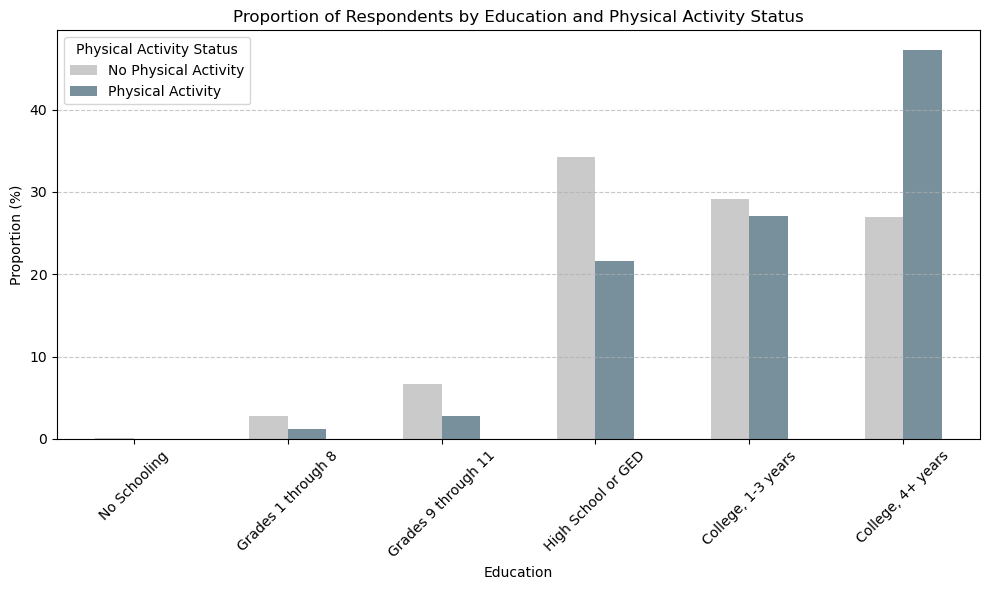

In [43]:
PhysActivity_pivot_Education = PhysActivitystack_Education.pivot(index='Education', columns='PhysActivity', values='proportion')

# Rename columns for clarity
PhysActivity_pivot_Education.columns = ['No Physical Activity', 'Physical Activity']

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
PhysActivity_pivot_Education.plot(kind='bar', ax=ax, color=['#CACACA', '#78909c'])

# Formatting
plt.title('Proportion of Respondents by Education and Physical Activity Status')
plt.xlabel('Education')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)  # Rotate x labels to horizontal
ax.set_xticklabels(['No Schooling', 'Grades 1 through 8', 'Grades 9 through 11', 'High School or GED', 'College, 1-3 years', 'College, 4+ years'], rotation=45)
plt.legend(title='Physical Activity Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [44]:
#Chi_square test Income
# Create a contingency table
contingency_table03 = pd.crosstab(df_trimmed['Income'], df_trimmed['PhysActivity'])

#Rename Column and Row Labels:
contingency_table03.columns = ['No exercise during the last month', 'Exercise during the last month']
contingency_table03.index = ['Less than \$10k', '\$10k to \$15k', '\$15k to \$20k', '\$20k to \$25k', '\$25k to \$35k', '\$35k to \$50k', '\$50k to \$75k', 'More than \$75k']

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table03)

# Print results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation of results

if p_value < 0.05:
    print(f"The p-value of the chi-squared test is {round(p_value,4)}. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Income range.")
else:
    print(f"The p-value of the chi-squared test is {round(p_value,4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. There is no significant association between Physical Activity and Income range.")

contingency_table03

Chi-Square Statistic: 10442.361605055385
P-Value: 0.0
Degrees of Freedom: 7
Expected Frequencies Table:
[[ 2388.54998423  7422.45001577]
 [ 2868.64585304  8914.35414696]
 [ 3893.84042889 12100.15957111]
 [ 4901.99306213 15233.00693787]
 [ 6301.38000631 19581.61999369]
 [ 8878.85209713 27591.14790287]
 [10521.93882056 32697.06117944]
 [22004.79974771 68380.20025229]]
The p-value of the chi-squared test is 0.0. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Income range.


,No exercise during the last month,Exercise during the last month
Less than \$10k,3892,5919
\$10k to \$15k,4699,7084
\$15k to \$20k,5941,10053
\$20k to \$25k,6889,13246
\$25k to \$35k,7865,18018
\$35k to \$50k,9638,26832
\$50k to \$75k,9391,33828
More than \$75k,13445,76940


In [45]:
contingency_table04 = pd.crosstab(df_trimmed['Age'], df_trimmed['PhysActivity'])

#Rename Column and Row Labels:
contingency_table04.columns = ['No exercise during the last month', 'Exercise during the last month']
contingency_table04.index = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table04)

# Print results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation of results

if p_value < 0.05:
    print(f"The p-value of the chi-squared test is {round(p_value,4)}. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Age range.")
else:
    print(f"The p-value of the chi-squared test is {round(p_value,4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. There is no significant association between Physical Activity and Age range.")

contingency_table04

Chi-Square Statistic: 2421.66641023268
P-Value: 0.0
Degrees of Freedom: 12
Expected Frequencies Table:
[[ 1387.70104068  4312.29895932]
 [ 1849.7811416   5748.2188584 ]
 [ 2707.96467991  8415.03532009]
 [ 3365.29675181 10457.70324819]
 [ 3933.52380952 12223.47619048]
 [ 4825.06086408 14993.93913592]
 [ 6406.30968149 19907.69031851]
 [ 7506.24534847 23325.75465153]
 [ 8093.46199937 25150.53800063]
 [ 7837.8328603  24356.1671397 ]
 [ 5729.25764743 17803.74235257]
 [ 3890.43204037 12089.56795963]
 [ 4227.13213497 13135.86786503]]
The p-value of the chi-squared test is 0.0. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Age range.


,No exercise during the last month,Exercise during the last month
18-24,749,4951
25-29,1185,6413
30-34,1952,9171
35-39,2759,11064
40-44,3385,12772
45-49,4451,15368
50-54,6380,19934
55-59,7707,23125
60-64,8357,24887
65-69,7956,24238


In [46]:
contingency_table05 = pd.crosstab(df_trimmed['Education'], df_trimmed['PhysActivity'])

#Rename Column and Row Labels:
contingency_table05.columns = ['No exercise during the last month', 'Exercise during the last month']
contingency_table05.index = ['No Schooling', 'Grades 1 through 8', 'Grades 9 through 11', 'High School or GED', 'College, 1-3 years', 'College, 4+ years']

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table05)

# Print results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation of results

if p_value < 0.05:
    print(f"The p-value of the chi-squared test is {round(p_value,4)}. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Education range.")
else:
    print(f"The p-value of the chi-squared test is {round(p_value,4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. There is no significant association between Physical Activity and Education range.")

contingency_table05

Chi-Square Statistic: 10333.653326418636
P-Value: 0.0
Degrees of Freedom: 5
Expected Frequencies Table:
[[4.23614002e+01 1.31638600e+02]
 [9.84293914e+02 3.05870609e+03]
 [2.30747903e+03 7.17052097e+03]
 [1.52768843e+04 4.74731157e+04]
 [1.70200315e+04 5.28899685e+04]
 [2.61289499e+04 8.11960501e+04]]
The p-value of the chi-squared test is 0.0. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Education range.


,No exercise during the last month,Exercise during the last month
No Schooling,79,95
Grades 1 through 8,1742,2301
Grades 9 through 11,4119,5359
High School or GED,21163,41587
"College, 1-3 years",18027,51883
"College, 4+ years",16630,90695


In [47]:
#Overall Summary:
#In all cases, the p-values are significantly less than 0.05, indicating strong evidence of associations between physical 
#activity and each of the factors analyzed: diabetes status, income, age, and education. This suggests that physical activity 
#is influenced by these demographic and health-related factors, with notable differences in engagement levels across different categories.

#Analysis of Physical Activity and Education Level

#An intriguing pattern emerged when examining the relationship between education level and physical activity. 
#Specifically, individuals with lower education levels tend to have lower rates of engaging in physical exercise. 
#This finding is noteworthy given that most educational systems mandate physical education (PE) classes or extracurricular activities that include sports.

#It’s important to consider that while educational institutions do provide structured physical activities, 
#they might not fully capture the broader lifestyle or personal engagement in exercise outside of school hours. 
#Hence, the observed lower exercise rates among individuals with less education may reflect broader socio-economic 
#factors or differences in lifestyle preferences and opportunities rather than the quality of physical education provided.

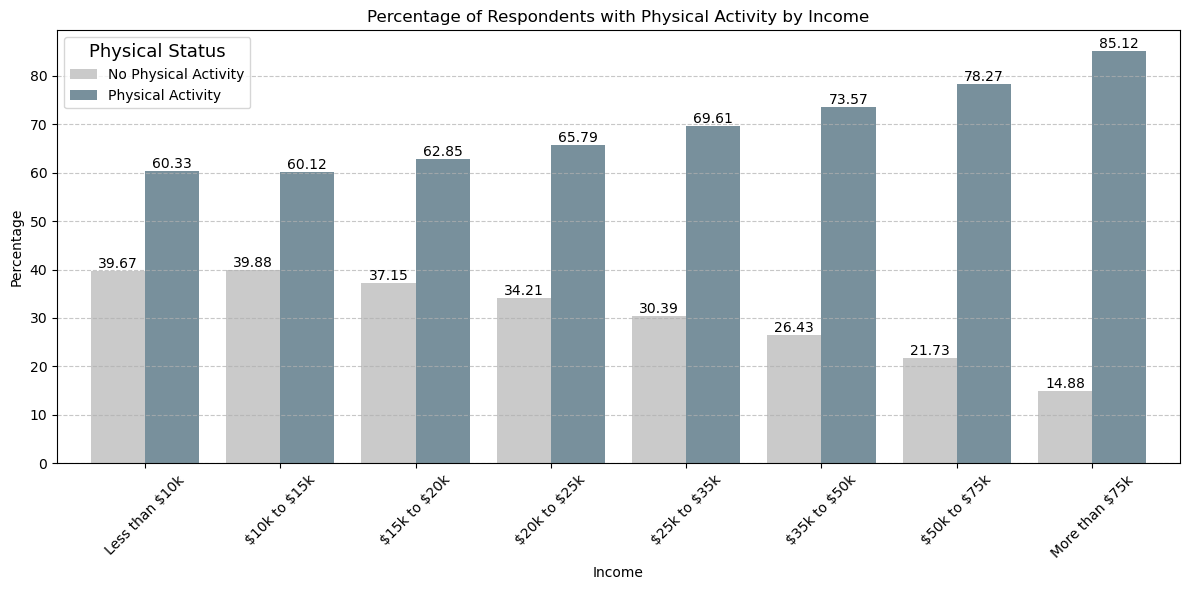

In [48]:
# Group by income and diabetes, count the number of responses in each row
dia_income_PhysActivity02 = df_trimmed.groupby(["Income", "PhysActivity"]).size().reset_index(name='count')

# Calculate the sum of responses for each income group
income_group_sum_PhysActivity02 = dia_income_PhysActivity02.groupby('Income')['count'].transform('sum')

# Calculate the proportions
dia_income_PhysActivity02['proportion'] = (dia_income_PhysActivity02['count'] / income_group_sum_PhysActivity02) * 100

# Pivot the table
income_pivot_df_PhysActivity02 = dia_income_PhysActivity02.pivot(index='Income', columns='PhysActivity', values='proportion')

# Rename columns for easy display formatting
income_pivot_df_PhysActivity02.columns = ['No Physical Activity', 'Physical Activity']

# Rename indices for easy display formatting
index_mapping = {1.0: 'Less than \$10k',
                 2.0: '\$10k to \$15k',
                 3.0: '\$15k to \$20k',
                 4.0: '\$20k to \$25k',
                 5.0: '\$25k to \$35k',
                 6.0: '\$35k to \$50k',
                 7.0: '\$50k to \$75k',
                 8.0: 'More than \$75k'
                }
income_pivot_df_PhysActivity02.index = income_pivot_df_PhysActivity02.index.map(index_mapping)

# Plot the table
ax = income_pivot_df_PhysActivity02.plot(kind='bar', width = .8, figsize=(12, 6), color=['#CACACA', '#78909c'])
plt.title('Percentage of Respondents with Physical Activity by Income')
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(income_pivot_df_PhysActivity02.index)), labels=income_pivot_df_PhysActivity02.index, rotation=45)
plt.legend(title='Physical Status', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the percentages?
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')
#ax.bar_label(ax.containers[2], fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.savefig("images/income_vs_physactivity.png")
plt.show()

In [49]:
#Chi_square test Income with corrected proportion percentage
# Run the Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(income_pivot_df_PhysActivity02)

# Output the results
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p_value < 0.05:
    print(f"The p-value of the chi-squared test is {round(p_value,4)}. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Income range.")
else:
    print(f"The p-value of the chi-squared test is {round(p_value,4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. There is no significant association between Physical Activity and Income range.")


Chi-squared statistic: 26.75970670463959
p-value: 0.00036814672696583
Degrees of freedom: 7
Expected frequencies:
[[30.54081828 69.45918172]
 [30.54081828 69.45918172]
 [30.54081828 69.45918172]
 [30.54081828 69.45918172]
 [30.54081828 69.45918172]
 [30.54081828 69.45918172]
 [30.54081828 69.45918172]
 [30.54081828 69.45918172]]
The p-value of the chi-squared test is 0.0. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Income range.


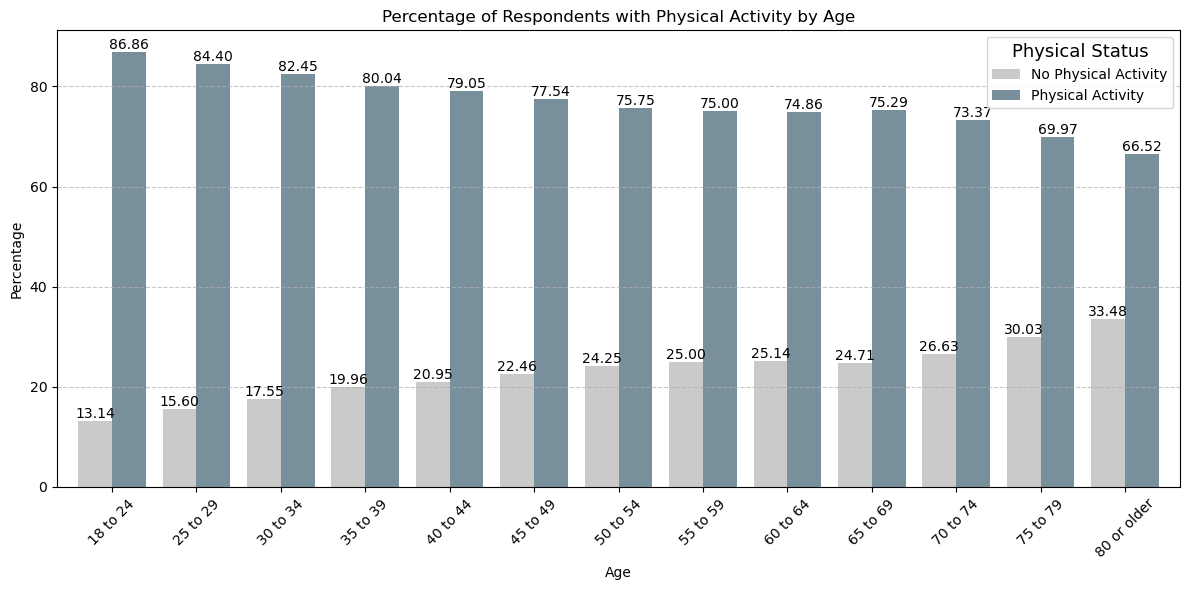

In [50]:
# updated!!! Group by age and physactivity, count the number of responses in each row

dia_age_PhysActivity02 = df_trimmed.groupby(["Age", "PhysActivity"]).size().reset_index(name='count')

# Calculate the sum of responses for each income group
age_group_sum_PhysActivity02 = dia_age_PhysActivity02.groupby('Age')['count'].transform('sum')

# Calculate the proportions
dia_age_PhysActivity02['proportion'] = (dia_age_PhysActivity02['count'] / age_group_sum_PhysActivity02) * 100

# Pivot the table
age_pivot_df_PhysActivity02 = dia_age_PhysActivity02.pivot(index='Age', columns='PhysActivity', values='proportion')

# Rename columns for easy display formatting
age_pivot_df_PhysActivity02.columns = ['No Physical Activity', 'Physical Activity']


# Rename indices for easy display formatting
index_mapping = {1.0: '18 to 24',
                 2.0: '25 to 29',
                 3.0: '30 to 34',
                 4.0: '35 to 39',
                 5.0: '40 to 44',
                 6.0: '45 to 49',
                 7.0: '50 to 54',
                 8.0: '55 to 59',
                 9.0: '60 to 64',
                 10.0: '65 to 69',
                 11.0: '70 to 74',
                 12.0: '75 to 79',
                 13.0: '80 or older'
                }

age_pivot_df_PhysActivity02.index = age_pivot_df_PhysActivity02.index.map(index_mapping)

# Plot the table
ax = age_pivot_df_PhysActivity02.plot(kind='bar', width = .8, figsize=(12, 6), color=['#CACACA', '#78909c'])
plt.title('Percentage of Respondents with Physical Activity by Age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(age_pivot_df_PhysActivity02.index)), labels=age_pivot_df_PhysActivity02.index, rotation=45)
plt.legend(title='Physical Status', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the percentages?
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')
#ax.bar_label(ax.containers[2], fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.savefig("images/age_vs_PhysActivity.png")
plt.show()

In [51]:
#Chi_square test Age with corrected proportion percentage
# Run the Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(age_pivot_df_PhysActivity02)

# Output the results
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p_value < 0.05:
    print(f"The p-value of the chi-squared test is {round(p_value,4)}. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Age range.")
else:
    print(f"The p-value of the chi-squared test is {round(p_value,4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. There is no significant association between Physical Activity and Age range.")



Chi-squared statistic: 21.516434256653678
p-value: 0.04331060895425237
Degrees of freedom: 12
Expected frequencies:
[[22.99145078 77.00854922]
 [22.99145078 77.00854922]
 [22.99145078 77.00854922]
 [22.99145078 77.00854922]
 [22.99145078 77.00854922]
 [22.99145078 77.00854922]
 [22.99145078 77.00854922]
 [22.99145078 77.00854922]
 [22.99145078 77.00854922]
 [22.99145078 77.00854922]
 [22.99145078 77.00854922]
 [22.99145078 77.00854922]
 [22.99145078 77.00854922]]
The p-value of the chi-squared test is 0.0. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Age range.


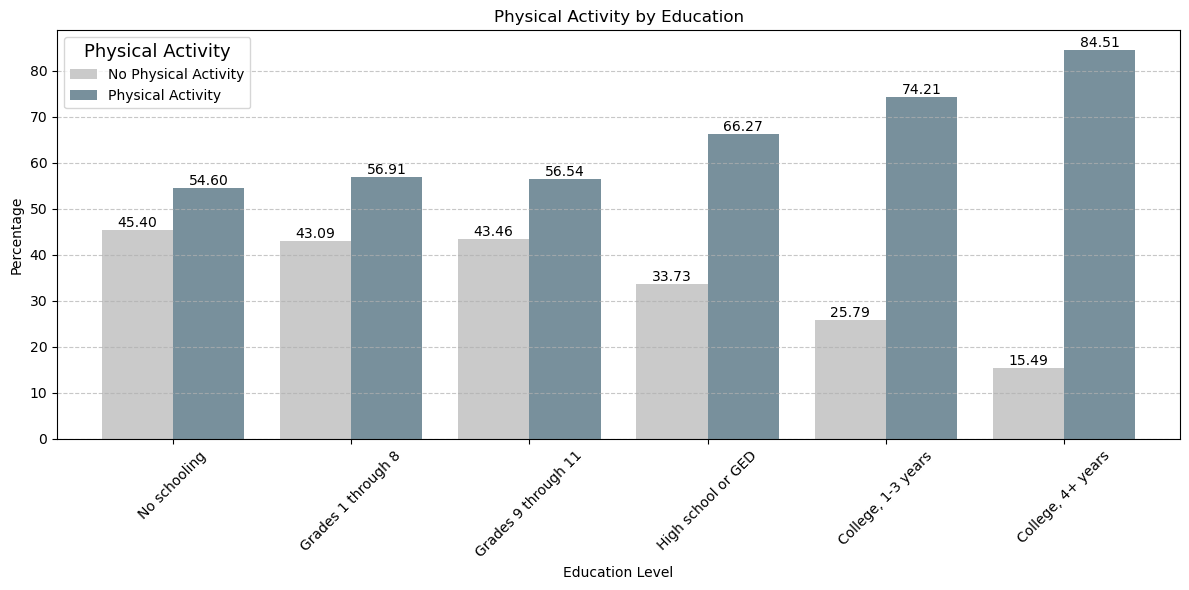

In [52]:
# Group by education and physical activity, count the number of responses in each row
edu_physactivity = df_trimmed.groupby(['Education', 'PhysActivity']).size().reset_index(name='count')

# Calculate the sum of responses for each education group
eduphysactivity_group_sum = edu_physactivity.groupby('Education')['count'].transform('sum')

# Calculate the proportions
edu_physactivity['proportion'] = (edu_physactivity['count'] / eduphysactivity_group_sum) * 100

# Pivot the table
eduphysactivity_pivot_df = edu_physactivity.pivot(index='Education', columns='PhysActivity', values='proportion')

# Rename columns for easy display formatting
eduphysactivity_pivot_df.columns = ['No Physical Activity', 'Physical Activity']

# Rename indices for easy display formatting
index_mapping = {1.0: 'No schooling',
                 2.0: 'Grades 1 through 8',
                 3.0: 'Grades 9 through 11',
                 4.0: 'High school or GED',
                 5.0: 'College, 1-3 years',
                 6.0: 'College, 4+ years',
                }

eduphysactivity_pivot_df.index = eduphysactivity_pivot_df.index.map(index_mapping)

# Plot the table
ax = eduphysactivity_pivot_df.plot(kind='bar', width = .8, figsize=(12, 6), color=colors)
plt.title('Physical Activity by Education')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(eduphysactivity_pivot_df.index)), labels=eduphysactivity_pivot_df.index, rotation=45)
plt.legend(title='Physical Activity', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the percentages?
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.savefig("images/education_vs_physactivity.png")
plt.show()

In [53]:
#Chi_square test Education with corrected proportion percentage
# Run the Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(eduphysactivity_pivot_df)

# Output the results
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p_value < 0.05:
    print(f"The p-value of the chi-squared test is {round(p_value,4)}. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Education range.")
else:
    print(f"The p-value of the chi-squared test is {round(p_value,4)}. As this value is greater than 0.05, we fail to reject the null hypothesis. There is no significant association between Physical Activity and Education range.")



Chi-squared statistic: 31.447974563871927
p-value: 7.640186592719318e-06
Degrees of freedom: 5
Expected frequencies:
[[34.492425 65.507575]
 [34.492425 65.507575]
 [34.492425 65.507575]
 [34.492425 65.507575]
 [34.492425 65.507575]
 [34.492425 65.507575]]
The p-value of the chi-squared test is 0.0. As this value is less than 0.05, we reject the null hypothesis. There is a significant association between Physical Activity and Education range.


## Abigail

In [55]:


# Group by cholesterol check status and diabetes status
dia_chol_check = df_trimmed.groupby(["CholCheck", "Diabetes_012"]).size().reset_index(name='count')
colors = ['#CACACA','#78909C','#616161']

# Separate the categories of those who did not have a cholesterol check (0) and those who did (1)
nocholcheck = dia_chol_check[dia_chol_check["CholCheck"] == 0].copy()
yescholcheck = dia_chol_check[dia_chol_check["CholCheck"] == 1].copy()
colors = ['#CACACA','#78909C','#616161']

# Find the total respondents per category (cholesterol check and no cholesterol check)
# Create a new column for the proportion of respondents in each row out of their respective category
nocholcheck_sum = nocholcheck["count"].sum()
nocholcheck["proportion"] = (nocholcheck["count"] / nocholcheck_sum) * 100

yescholcheck_sum = yescholcheck["count"].sum()
yescholcheck["proportion"] = (yescholcheck["count"] / yescholcheck_sum) * 100

# Using the pd.concat() function, combine the two tables into a new DataFrame that shows the proportions
cholcheck_stack = pd.concat([nocholcheck, yescholcheck], ignore_index=False)
cholcheck_stack


,CholCheck,Diabetes_012,count,proportion
0,0.0,0.0,9167,96.800422
1,0.0,1.0,62,0.654699
2,0.0,2.0,241,2.544879
3,1.0,0.0,204536,83.754146
4,1.0,1.0,4569,1.870931
5,1.0,2.0,35105,14.374923


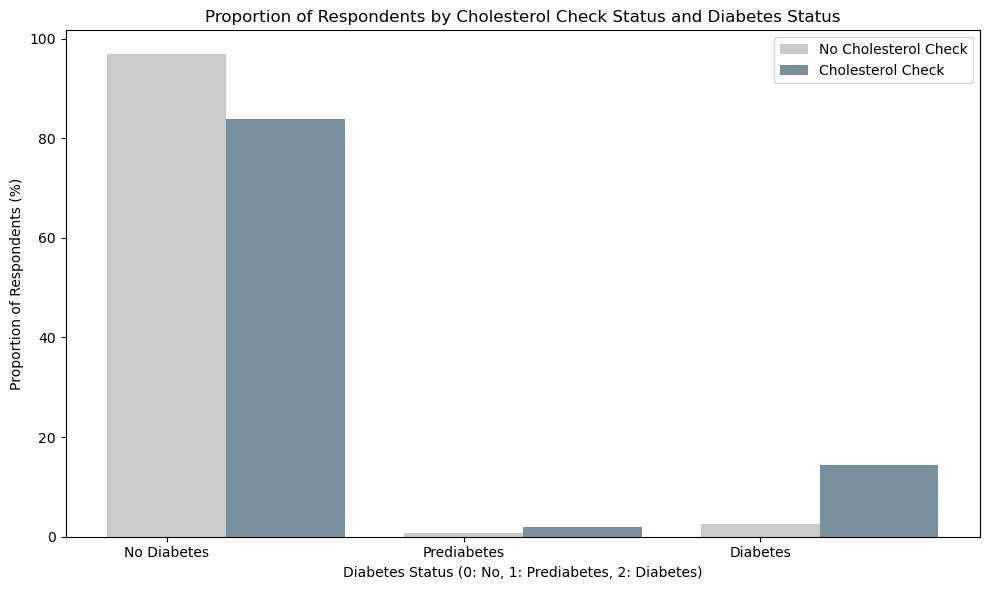

In [56]:

# Plot the proportions for cholesterol check status and diabetes status
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for the diabetes statuses
# colors = ['#CACACA','#78909C','#616161']

# Plot the no cholesterol check group
ax.bar(nocholcheck["Diabetes_012"], nocholcheck["proportion"], width=0.4, label="No Cholesterol Check", color=['#CACACA'], align='center')

# Plot the yes cholesterol check group, shifted slightly to the right
ax.bar(yescholcheck["Diabetes_012"] + 0.4, yescholcheck["proportion"], width=0.4, label="Cholesterol Check", color=['#78909C'], align='center')

# Set the labels and title
ax.set_xlabel("Diabetes Status (0: No, 1: Prediabetes, 2: Diabetes)")
ax.set_ylabel("Proportion of Respondents (%)")
ax.set_title("Proportion of Respondents by Cholesterol Check Status and Diabetes Status")
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['No Diabetes', 'Prediabetes', 'Diabetes'])

# Add a legend
ax.legend()

# Display the plot
plt.savefig("images/cholesterol_vs_diabetes.png")
plt.tight_layout()
plt.show()




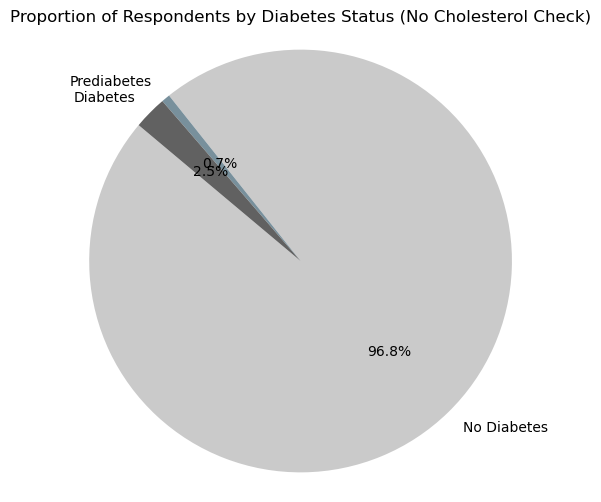

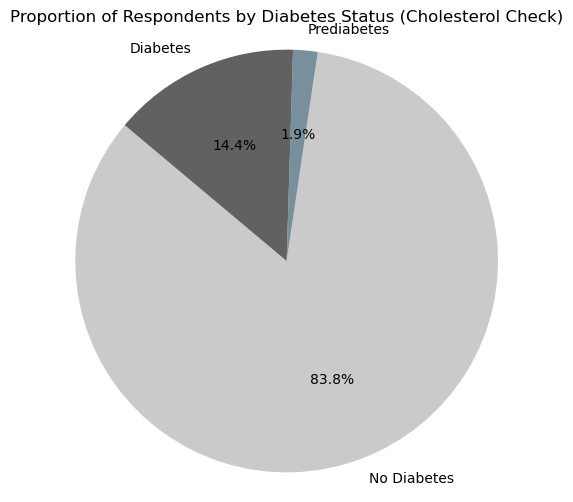

In [57]:

# Group by cholesterol check status and diabetes status
dia_chol_check = df_trimmed.groupby(["CholCheck", "Diabetes_012"]).size().reset_index(name='count')

# Separate the categories of those who did not have a cholesterol check (0) and those who did (1)
nocholcheck = dia_chol_check[dia_chol_check["CholCheck"] == 0].copy()
yescholcheck = dia_chol_check[dia_chol_check["CholCheck"] == 1].copy()

# Find the total respondents per category (cholesterol check and no cholesterol check)

# Create a new column for the proportion of respondents in each row out of their respective category
nocholcheck_sum = nocholcheck["count"].sum()
nocholcheck["proportion"] = (nocholcheck["count"] / nocholcheck_sum) * 100

yescholcheck_sum = yescholcheck["count"].sum()
yescholcheck["proportion"] = (yescholcheck["count"] / yescholcheck_sum) * 100

# Combine the two tables into a new DataFrame that shows the proportions
cholcheck_stack = pd.concat([nocholcheck, yescholcheck], ignore_index=True)

# Plot the data as pie charts
for chol_check_status, title in [(0, "No Cholesterol Check"), (1, "Cholesterol Check")]:
    # Filter the data for the current cholesterol check status
    data = cholcheck_stack[cholcheck_stack["CholCheck"] == chol_check_status]
    
    # Create the pie chart
    labels = ['No Diabetes', 'Prediabetes', 'Diabetes']
    sizes = data['proportion'].values
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors = ['#CACACA','#78909C','#616161'], autopct='%1.1f%%', startangle=140)
    plt.title(f"Proportion of Respondents by Diabetes Status ({title})")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig("images/cholesterol_vs_diabetes.png")
    plt.show()


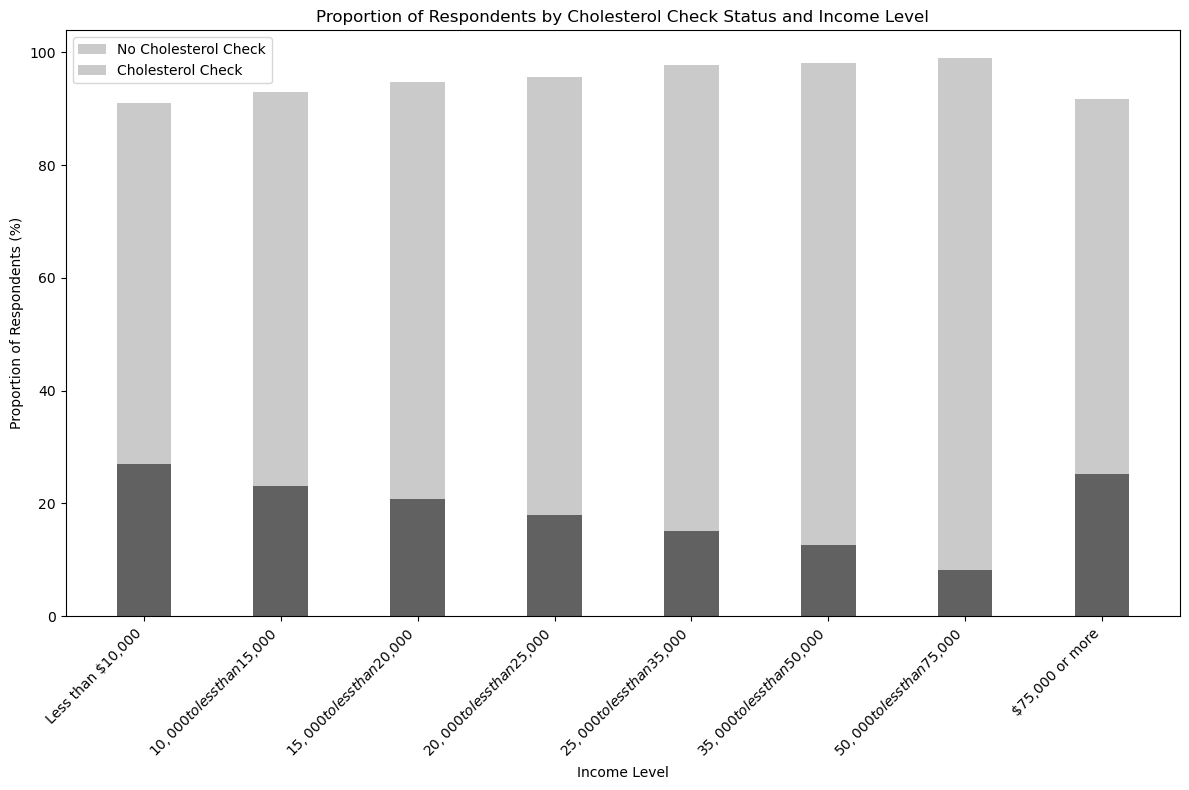

In [58]:

# Group by income
# Define the income scale mapping 
income_scale = {
    1: 'Less than $10,000',
    2: '$10,000 to less than $15,000',
    3: '$15,000 to less than $20,000',
    4: '$20,000 to less than $25,000',
    5: '$25,000 to less than $35,000',
    6: '$35,000 to less than $50,000',
    7: '$50,000 to less than $75,000',
    8: '$75,000 or more'
}

# Map the Income column to the descriptive categories
diabetes_df['Income'] = diabetes_df['Income'].map(income_scale)


# Group by income, cholesterol check status, and diabetes status
dia_income_chol = diabetes_df.groupby(["Income", "CholCheck", "Diabetes_012"]).size().reset_index(name='count')

# Separate categories based on cholesterol check status
nocholcheck_income = dia_income_chol[dia_income_chol["CholCheck"] == 0].copy()
yescholcheck_income = dia_income_chol[dia_income_chol["CholCheck"] == 1].copy()

# Calculate proportions
nocholcheck_income_sum = nocholcheck_income.groupby("Income")["count"].transform('sum')
nocholcheck_income["proportion"] = (nocholcheck_income["count"] / nocholcheck_income_sum) * 100

yescholcheck_income_sum = yescholcheck_income.groupby("Income")["count"].transform('sum')
yescholcheck_income["proportion"] = (yescholcheck_income["count"] / yescholcheck_income_sum) * 100

# Plot the proportions for cholesterol check status and diabetes status by income
fig, ax = plt.subplots(figsize=(12, 8))

# Colors for diabetes statuses
colors = ['#CACACA','#78909C','#616161']

# Plot the no cholesterol check group
ax.bar(nocholcheck_income["Income"], nocholcheck_income["proportion"], width=0.4, label="No Cholesterol Check", color=colors, align='center')

# Plot the yes cholesterol check group, shifted slightly to the right
ax.bar(yescholcheck_income["Income"], yescholcheck_income["proportion"], width=0.4, label="Cholesterol Check", color=colors, align='center')

# Set the labels and title
ax.set_xlabel("Income Level")
ax.set_ylabel("Proportion of Respondents (%)")
ax.set_title("Proportion of Respondents by Cholesterol Check Status and Income Level")
ax.set_xticks(range(len(income_scale)))
ax.set_xticklabels(list(income_scale.values()), rotation=45, ha="right")

# Add a legend
ax.legend()

# Display the plot
plt.savefig("images/cholesterol_vs_income.png")
plt.tight_layout()
plt.show()


In [59]:
# Create a chi squared test for cholesterol check vs income

from scipy.stats import chi2_contingency  # Import Chi-Square test function

contingency_table = pd.crosstab(diabetes_df['Income'], diabetes_df['CholCheck'])
chi2, p, dof, expected = chi2_contingency(contingency_table)


# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)


# Display the results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

# Interpretation
if p < 0.05:
    print("\nThere is a statistically significant association between income level and cholesterol check status (p < 0.05).")
else:
    print("\nThere is no statistically significant association between income level and cholesterol check status (p >= 0.05).")

Contingency Table:
CholCheck                      0.0    1.0
Income                                   
$10,000 to less than $15,000   446  11337
$15,000 to less than $20,000   646  15348
$20,000 to less than $25,000   811  19324
$25,000 to less than $35,000   996  24887
$35,000 to less than $50,000  1441  35029
$50,000 to less than $75,000  1645  41574
$75,000 or more               3030  87355
Less than $10,000              455   9356

Chi-Square Test Results:
Chi-Square Statistic: 74.3458140215178
P-Value: 1.9470932694446034e-13
Degrees of Freedom: 7

Expected Frequencies:
[[  439.8652239  11343.1347761 ]
 [  597.06393882 15396.93606118]
 [  751.64951908 19383.35048092]
 [  966.22520498 24916.77479502]
 [ 1361.44315673 35108.55684327]
 [ 1613.38666824 41605.61333176]
 [ 3374.11680069 87010.88319931]
 [  366.24948754  9444.75051246]]

There is a statistically significant association between income level and cholesterol check status (p < 0.05).


Diabetes_012                       0.0       1.0       2.0
Income                                                    
$10,000 to less than $15,000  0.951325  0.985955  0.988658
$15,000 to less than $20,000  0.949938  0.973872  0.990471
$20,000 to less than $25,000  0.950839  0.980392  0.991613
$25,000 to less than $35,000  0.954165  0.986371  0.992229
$35,000 to less than $50,000  0.953699  0.995989  0.994519
$50,000 to less than $75,000  0.956608  0.985034  0.996391
$75,000 or more               0.963519  0.993076  0.996525
Less than $10,000             0.941383  0.974522  0.987411


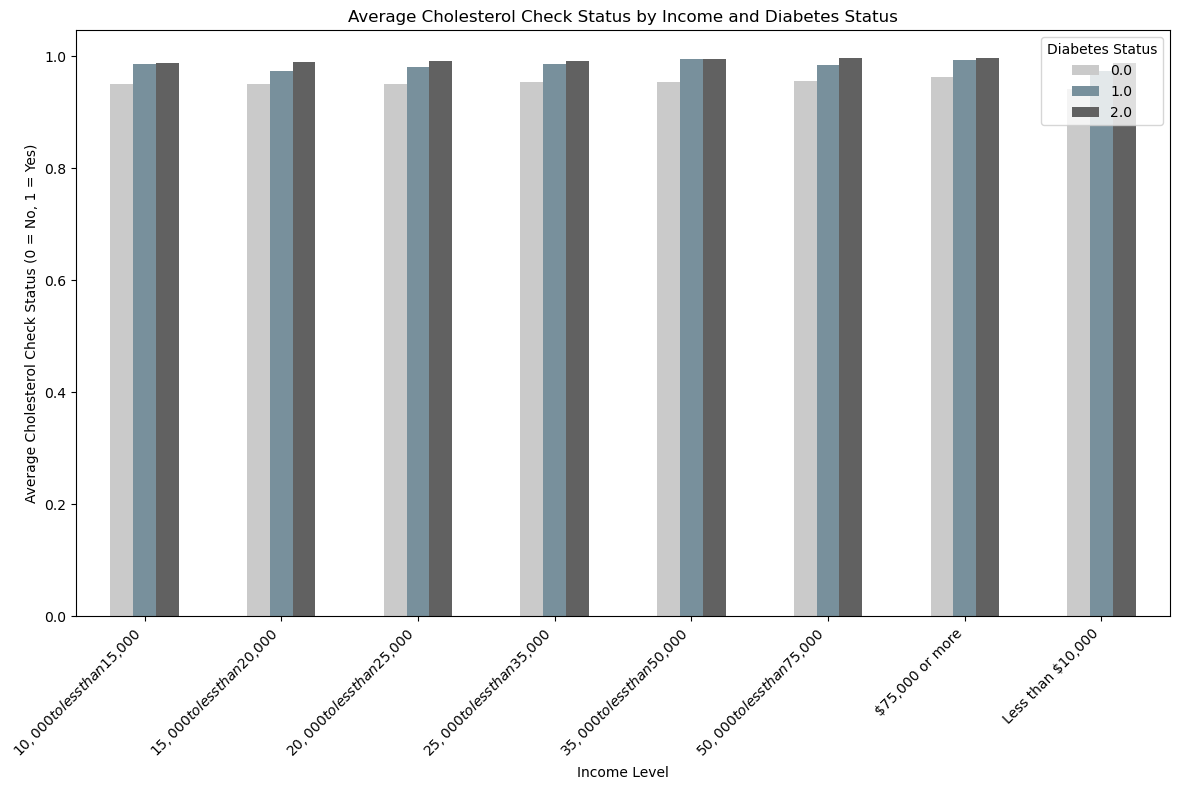

In [60]:
# Create a pivot table to summarize cholesterol check status by income and diabetes status
import seaborn as sns  # Import Seaborn for visualization



# Create a pivot table to summarize cholesterol check status by income and diabetes status
pivot_table = diabetes_df.pivot_table(
    values='CholCheck', 
    index='Income', 
    columns='Diabetes_012', 
    aggfunc='mean'
)

# Display the pivot table
print(pivot_table)

# Plot the pivot table as a bar plot using the specified colors
pivot_table.plot(kind='bar', figsize=(12, 8), color=['#CACACA','#78909C','#616161'])

# Customize the plot
plt.title("Average Cholesterol Check Status by Income and Diabetes Status")
plt.ylabel("Average Cholesterol Check Status (0 = No, 1 = Yes)")
plt.xlabel("Income Level")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Diabetes Status", loc='upper right')

# Show the plot
plt.savefig("images/cholesterol_vs_income.png")
plt.tight_layout()
plt.show()


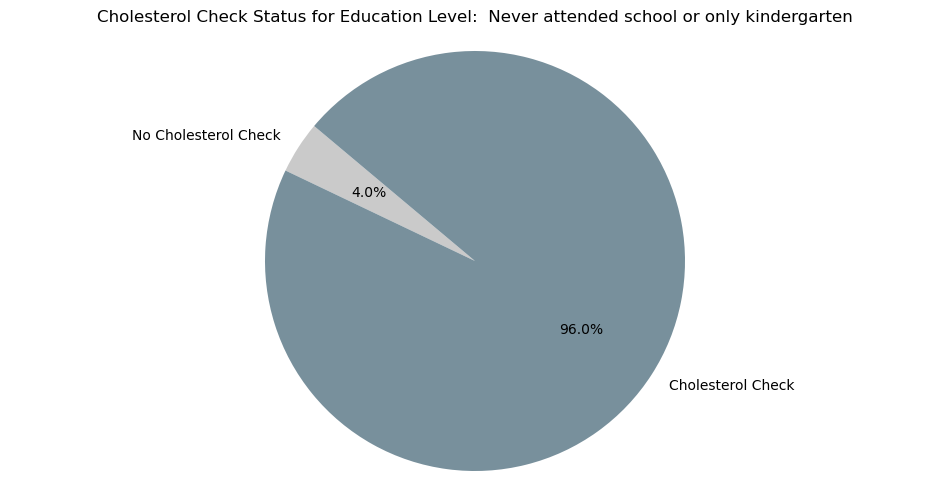

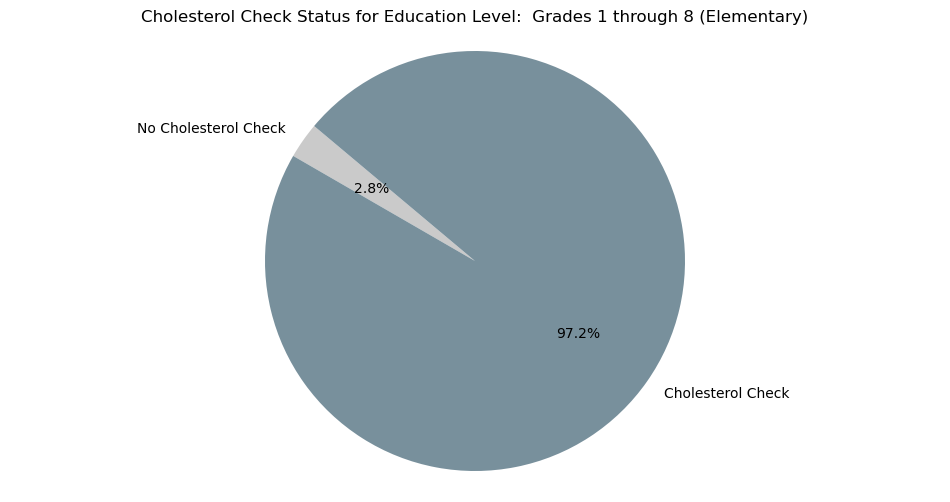

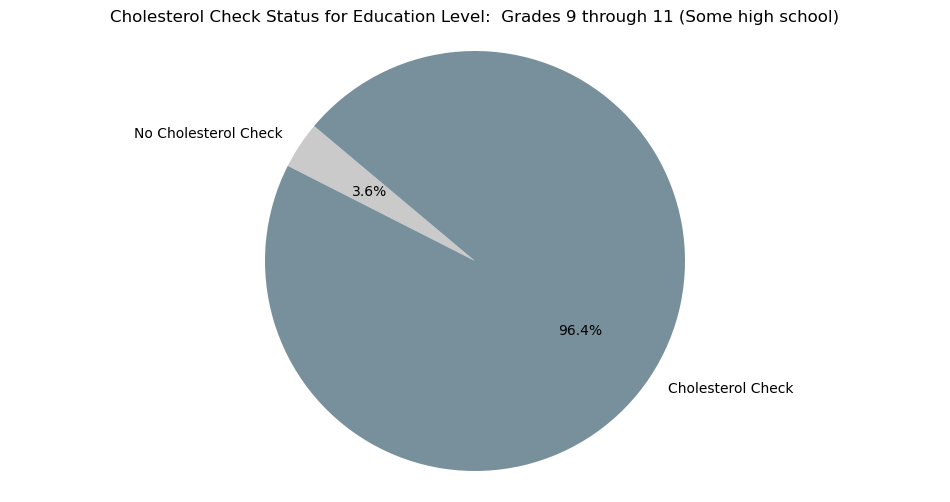

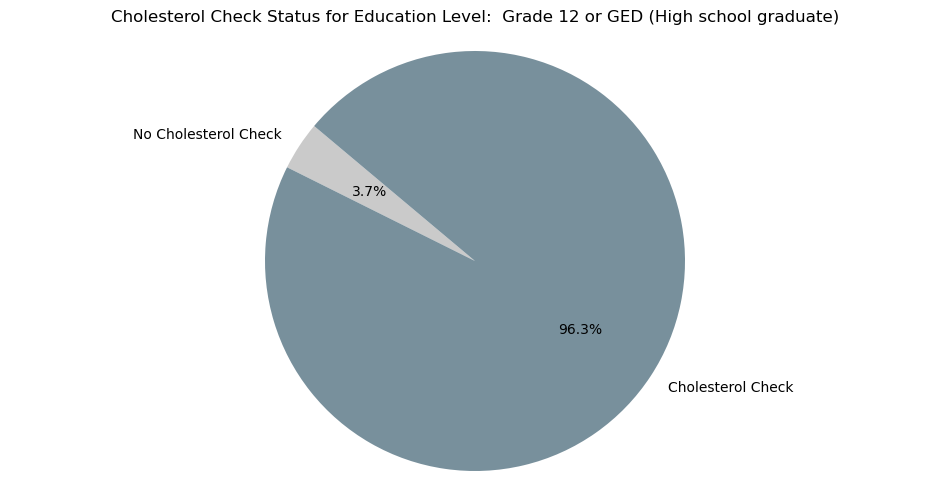

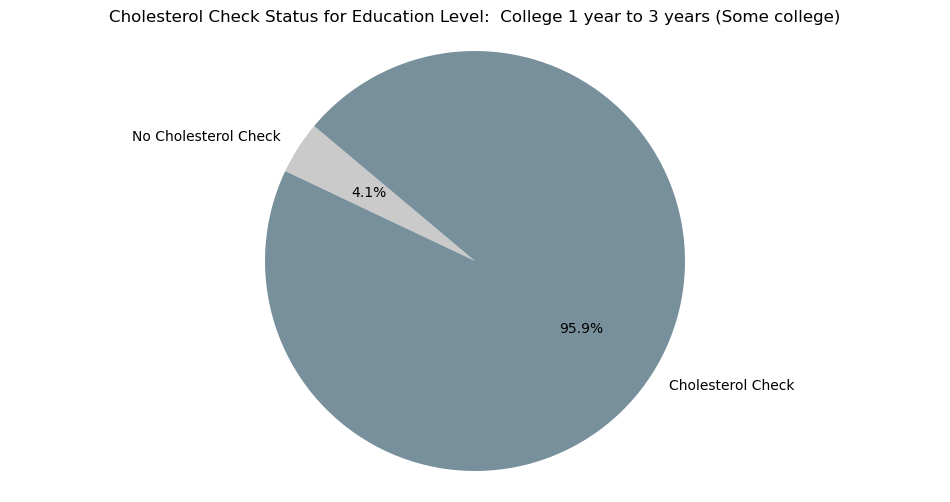

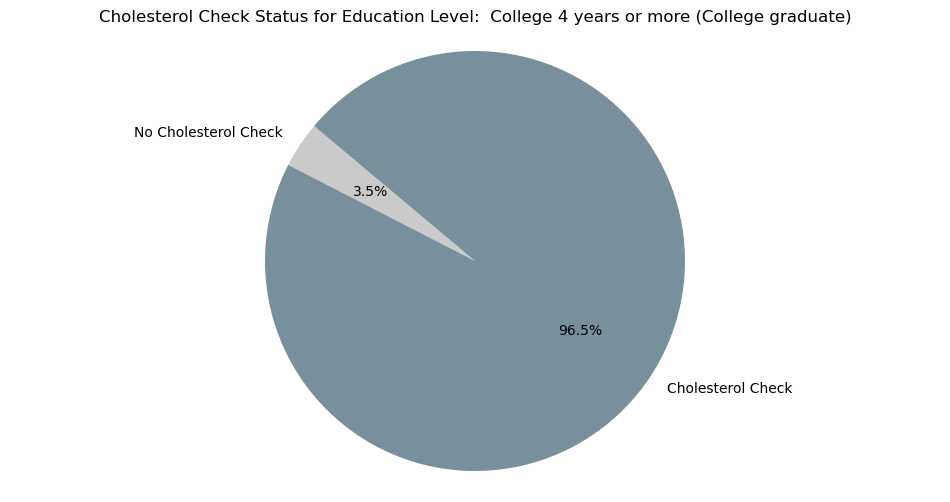

In [61]:
# Create pie charts to visualize the average cholesterol check status by education level and diabetes status.


# Define the education scale mapping
education_scale = {
    1: 'Never attended school or only kindergarten',
    2: 'Grades 1 through 8 (Elementary)',
    3: 'Grades 9 through 11 (Some high school)',
    4: 'Grade 12 or GED (High school graduate)',
    5: 'College 1 year to 3 years (Some college)',
    6: 'College 4 years or more (College graduate)'
}

# Map the Education column to the descriptive categories
diabetes_df['Education'] = diabetes_df['Education'].map(education_scale)

# Drop rows with missing data in the relevant columns
diabetes_df = diabetes_df.dropna(subset=['Education', 'CholCheck', 'Diabetes_012'])

# Group the data by Education and CholCheck to count occurrences
education_cholcheck = diabetes_df.groupby(['Education', 'CholCheck']).size().reset_index(name='count')

# Create a pie chart for each education level
i = 1
for education_level in education_scale.values():

    # Filter the data for the current education level
    level_data = education_cholcheck[education_cholcheck['Education'] == education_level]
    labels = ['No Cholesterol Check', 'Cholesterol Check']
    sizes = level_data['count'].values if not level_data.empty else [0, 0]
    # Filter the data for the current education level
    level_data = education_cholcheck[education_cholcheck['Education'] == education_level]
    
    # Only create a pie chart if there is data
    if not level_data.empty:
        labels = ['No Cholesterol Check', 'Cholesterol Check']
        sizes = level_data['count'].values
        colors = ['#CACACA','#78909C','#616161']
        
        # Plot the pie chart
        plt.figure(figsize=(12, 6))
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
        plt.title(f"Cholesterol Check Status for Education Level:  {education_level}")
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
       # plt.savefig("images/cholesterol_vs_education.png")
        plt.savefig(f"images/cholesterol_vs_education{i}.png")
        plt.show()
    i += 1
   

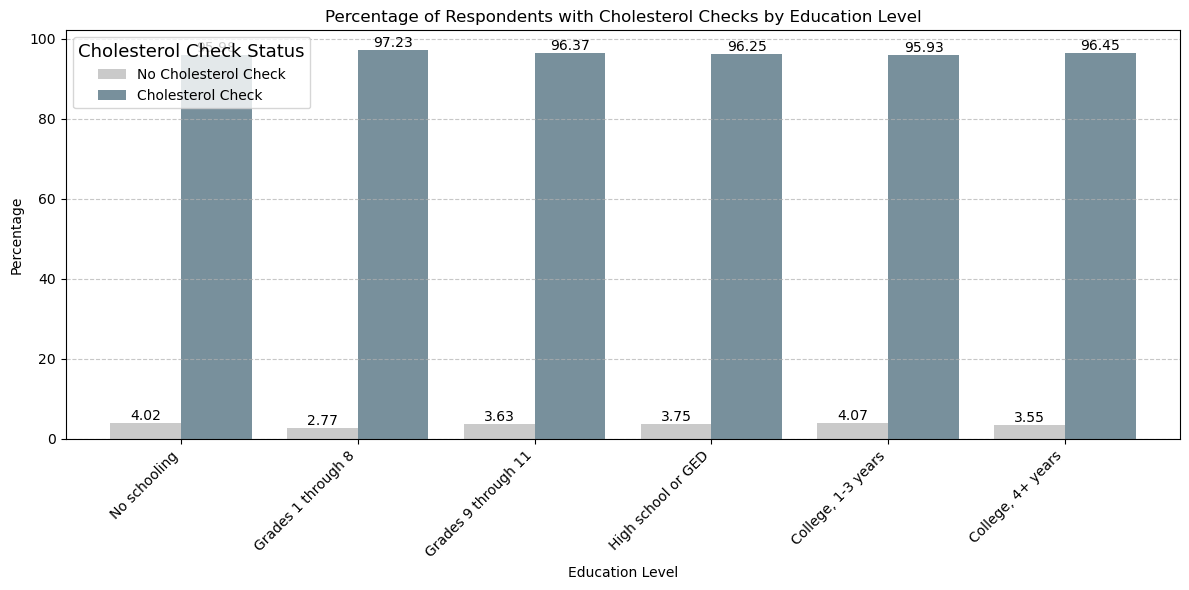

In [62]:
# Create a bar chart to visualize the average cholesterol check status by education level and diabetes status.


# Group by education and cholesterol check status, then count the occurrences
dia_edu = df_trimmed.groupby(["Education", "CholCheck"]).size().reset_index(name='count')

# Calculate the sum of responses for each education group
education_group_sum = dia_edu.groupby('Education')['count'].transform('sum')

# Calculate the proportions
dia_edu['proportion'] = (dia_edu['count'] / education_group_sum) * 100

# Pivot the table to prepare for plotting
edu_pivot_df = dia_edu.pivot(index='Education', columns='CholCheck', values='proportion')

# Rename columns for clarity
edu_pivot_df.columns = ['No Cholesterol Check', 'Cholesterol Check']

# Map the education levels for better display
index_mapping = {
    1: 'No schooling',
    2: 'Grades 1 through 8',
    3: 'Grades 9 through 11',
    4: 'High school or GED',
    5: 'College, 1-3 years',
    6: 'College, 4+ years',
}
edu_pivot_df.index = edu_pivot_df.index.map(index_mapping)

# Define colors for the bar chart
colors = ['#CACACA','#78909C']

# Plot the table as a bar chart
ax = edu_pivot_df.plot(kind='bar', width=0.8, figsize=(12, 6), color=colors)
plt.title('Percentage of Respondents with Cholesterol Checks by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Cholesterol Check Status', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("images/cholesterol_vs_education.png")

# Label the percentages on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.show()




In [63]:
# Education data shown with the Chi-Square Test
# Create a contingency table

from scipy.stats import chi2_contingency  # Import Chi-Square test function
contingency_table = pd.crosstab(diabetes_df['Education'], diabetes_df['CholCheck'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
colors = ['#CACACA','#78909C','#616161']
print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)
plt.savefig("images/cholesterol_vs_education.png")
# Interpretation
if p < 0.05:
    print("\nThere is a statistically significant association between education level and cholesterol check status (p < 0.05).")
else:
    print("\nThere is no statistically significant association between education level and cholesterol check status (p >= 0.05).")

# Create a summary DataFrame for the Chi-Square test results
chi_square_results = pd.DataFrame({
    'Chi-Square Statistic': [chi2],
    'P-Value': [p],
    'Degrees of Freedom': [dof]
})

Contingency Table:
CholCheck                                    0.0     1.0
Education                                               
College 1 year to 3 years (Some college)    2845   67065
College 4 years or more (College graduate)  3810  103515
Grade 12 or GED (High school graduate)      2352   60398
Grades 1 through 8 (Elementary)              112    3931
Grades 9 through 11 (Some high school)       344    9134
Never attended school or only kindergarten     7     167

Chi-Square Test Results:
Chi-Square Statistic: 42.82749480123138
P-Value: 4.00481765876846e-08
Degrees of Freedom: 5

Expected Frequencies:
[[2.60977491e+03 6.73002251e+04]
 [4.00649539e+03 1.03318505e+05]
 [2.34248857e+03 6.04075114e+04]
 [1.50927192e+02 3.89207281e+03]
 [3.53818433e+02 9.12418157e+03]
 [6.49550615e+00 1.67504494e+02]]

There is a statistically significant association between education level and cholesterol check status (p < 0.05).


<Figure size 640x480 with 0 Axes>

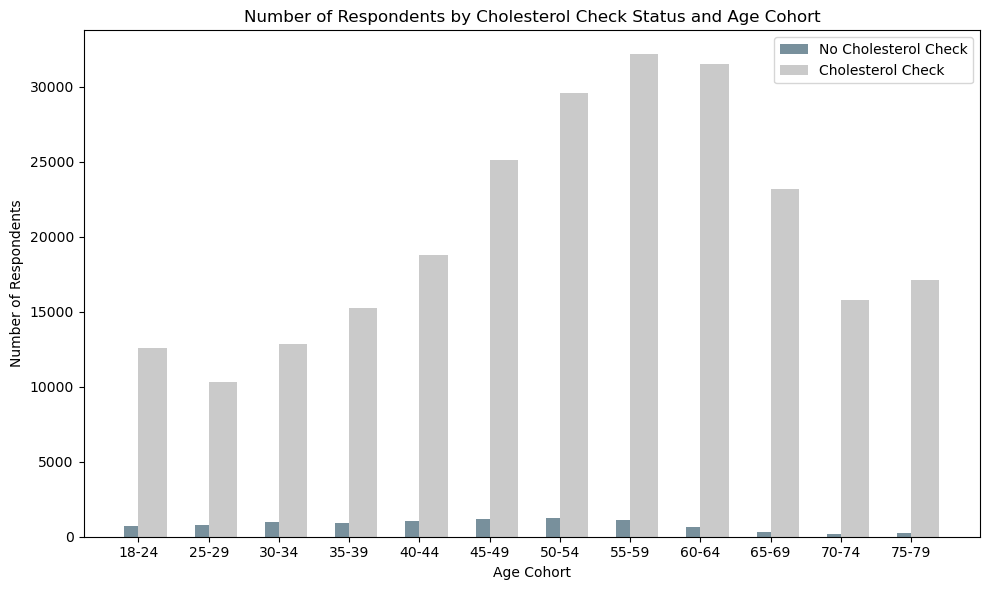

In [64]:
# Cholesterol checks by age


# Map the 13-level age categories (_AGEG5YR) to their corresponding age ranges
age_map = {
    1: 18, 2: 25, 3: 30, 4: 35, 5: 40, 6: 45,
    7: 50, 8: 55, 9: 60, 10: 65, 11: 70, 12: 75, 13: 80
}

# Apply the mapping to create a new 'Mapped_Age' column
diabetes_df['Mapped_Age'] = diabetes_df['Age'].map(age_map)


# Define the new age cohorts using bins and labels
age_bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']




# Create a new column in the DataFrame for age cohorts
diabetes_df['Age_Cohort'] = pd.cut(diabetes_df['Mapped_Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Drop rows with missing data in the relevant columns
diabetes_df = diabetes_df.dropna(subset=['Age_Cohort', 'CholCheck'])

# Group by age cohort and cholesterol check status, and count the number of participants for each category
dia_age_chol = diabetes_df.groupby(["Age_Cohort", "CholCheck"], observed=True).size().reset_index(name='count')

# Plot the data as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Separate data into groups based on cholesterol check status
nocholcheck = dia_age_chol[dia_age_chol["CholCheck"] == 0].copy()
yescholcheck = dia_age_chol[dia_age_chol["CholCheck"] == 1].copy()

# Plotting the no cholesterol check group
ax.bar(nocholcheck["Age_Cohort"], nocholcheck["count"], width=0.4, label="No Cholesterol Check", align='center', color = ['#78909C'])
colors = ['#78909C','#616161', '#CACACA']

# Plotting the cholesterol check group, shifted slightly to the right
ax.bar(yescholcheck["Age_Cohort"], yescholcheck["count"], width=0.4, label="Cholesterol Check", align='edge', color= [ '#CACACA'])
colors = ['#78909C','#616161', '#CACACA']
# Set the labels and title
colors = ['#78909C','#616161', '#CACACA']
ax.set_xlabel("Age Cohort")
ax.set_ylabel("Number of Respondents")
ax.set_title("Number of Respondents by Cholesterol Check Status and Age Cohort")
ax.legend()
plt.savefig("images/cholesterol_vs_age.png")

# Display the plot
plt.tight_layout()
plt.show()




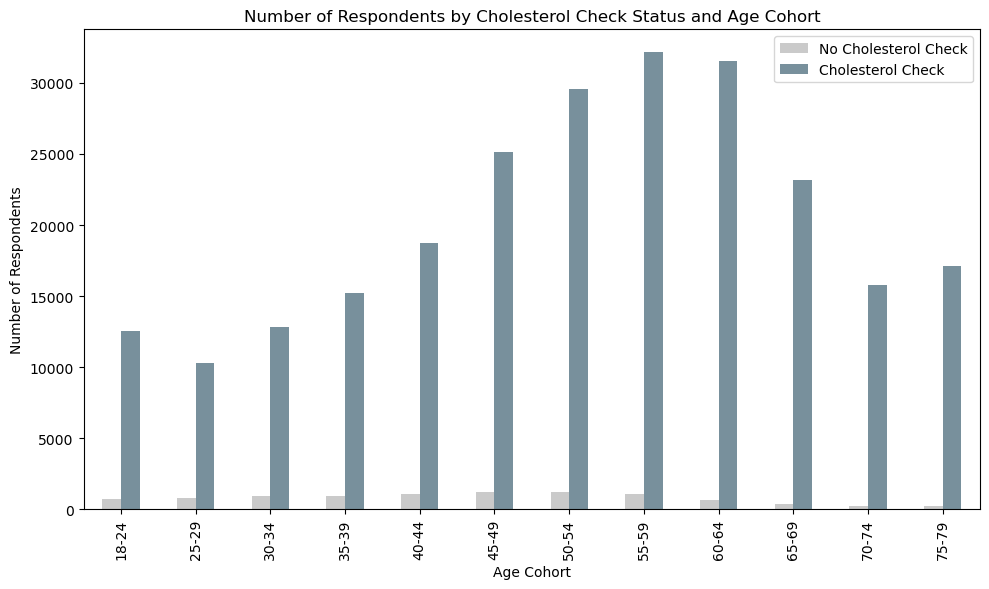

In [65]:
# Cholesterol by age shown in a pivot table 

pivot_table = diabetes_df.pivot_table(
    values='Mapped_Age', 
    index='Age_Cohort', 
    columns='CholCheck', 
    aggfunc='count', 
    fill_value=0, 
    observed=True  # Set observed=True to silence the warning and use future behavior
)

# Plot the pivot table as a bar chart 
colors = ['#CACACA','#78909C','#616161']
pivot_table.plot(kind='bar', figsize=(10, 6), color=colors)


# Set the labels and title
plt.xlabel("Age Cohort")
plt.ylabel("Number of Respondents")
plt.title("Number of Respondents by Cholesterol Check Status and Age Cohort")
plt.legend(["No Cholesterol Check", "Cholesterol Check"])
plt.savefig("images/cholesterol_vs_age.png")

# Display the plot
plt.tight_layout()
plt.show()


In [66]:
# Cholesterol by age chi- squared test


# Map the 13-level age categories (_AGEG5YR) to their corresponding age ranges
age_map = {
    1: 18, 2: 25, 3: 30, 4: 35, 5: 40, 6: 45,
    7: 50, 8: 55, 9: 60, 10: 65, 11: 70, 12: 75, 13: 80
}

# Apply the mapping to create a new 'Mapped_Age' column
diabetes_df['Mapped_Age'] = diabetes_df['Age'].map(age_map)

# Define the new age cohorts using bins and labels
age_bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

# Create a new column in the DataFrame for age cohorts
diabetes_df['Age_Cohort'] = pd.cut(diabetes_df['Mapped_Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Drop rows with missing data in the relevant columns
diabetes_df = diabetes_df.dropna(subset=['Age_Cohort', 'CholCheck'])

# Create a contingency table between Age_Cohort and CholCheck
contingency_table = pd.crosstab(diabetes_df['Age_Cohort'], diabetes_df['CholCheck'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

# Interpretation
if p < 0.05:
    print("\nThere is a statistically significant association between age cohort and cholesterol check status (p < 0.05).")
else:
    print("\nThere is no statistically significant association between age cohort and cholesterol check status (p >= 0.05).")




Contingency Table:
CholCheck    0.0    1.0
Age_Cohort             
18-24        724  12574
25-29        797  10326
30-34        968  12855
35-39        911  15246
40-44       1059  18760
45-49       1207  25107
50-54       1247  29585
55-59       1089  32155
60-64        657  31537
65-69        344  23189
70-74        213  15767
75-79        254  17109

Chi-Square Test Results:
Chi-Square Statistic: 2371.0519678520427
P-Value: 0.0
Degrees of Freedom: 11

Expected Frequencies:
[[  496.420924   12801.579076  ]
 [  415.22709713 10707.77290287]
 [  516.01943393 13306.98056607]
 [  603.14880952 15553.85119048]
 [  739.85308262 19079.14691738]
 [  982.31464838 25331.68535162]
 [ 1150.97382529 29681.02617471]
 [ 1241.0149795  32002.9850205 ]
 [ 1201.81795963 30992.18204037]
 [  878.49854147 22654.50145853]
 [  596.54131189 15383.45868811]
 [  648.16938663 16714.83061337]]

There is a statistically significant association between age cohort and cholesterol check status (p < 0.05).


Summary Analysis: Cholesterol Checks by Age, Education, and Income:

18-50 Cohort: This younger cohort showed a high rate of cholesterol checks, but a slightly larger proportion of this group had not undergone a cholesterol check compared to older cohorts.
51-64 Cohort: The middle-age cohort exhibited a higher compliance rate for cholesterol checks, likely reflecting increased health awareness or medical advice as individuals approach retirement age.
65-84 Cohort: The oldest cohort had the highest proportion of individuals who had undergone cholesterol checks, which aligns with the increased health monitoring typically recommended for older adults.

Lower Education Levels: Individuals with lower educational attainment, particularly those who never attended school or only completed elementary education, had the lowest rates of cholesterol checks.
Higher Education Levels: Respondents with higher education levels, especially those with college education, were significantly more likely to have undergone cholesterol checks. This suggests that higher education is associated with greater health awareness and access to healthcare services.
Statistical Significance: The chi-square test indicated a statistically significant association between education level and cholesterol check status, reinforcing the importance of education in preventive healthcare.

Lower Income Groups: Individuals in lower income brackets were less likely to have undergone cholesterol checks. This may be due to financial barriers, lack of access to healthcare, or lower health literacy.
Higher Income Groups: Those in higher income brackets had a significantly higher rate of cholesterol checks, suggesting that income positively influences access to healthcare services and the ability to afford preventive care.
Economic Disparities: The analysis highlights the disparities in healthcare access and utilization based on income, with wealthier individuals being more proactive in managing their health through regular cholesterol checks.


The analysis of cholesterol checks across different demographic indicators—age, education, and income—reveals clear patterns of health behavior and access to preventive care. Older adults, those with higher educational attainment, and individuals with higher incomes are more likely to have undergone cholesterol checks. These findings underscore the critical role of socioeconomic factors in healthcare access and the importance of targeted public health interventions to increase preventive care among younger, less educated, and lower-income populations. By addressing these disparities, we can improve overall public health outcomes and reduce the risk of cardiovascular diseases associated with high cholesterol levels.

## Muad

In [69]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc




In [70]:
# Trim the dataframe so it is only our variables of interest
df_trimmed = diabetes_df[["Diabetes_012", "Income", "Education", "Age", "HvyAlcoholConsump", "Fruits", "Veggies", "CholCheck", "HighChol", "PhysActivity", "BMI"]].copy()


In [71]:
# Map the education codes to their corresponding labels and set the order
education_labels = {
    1: 'Never attended/KG',
    2: 'Grade 1-8',
    3: 'Grade 9-11',
    4: '12-GED',
    5: 'College 1-3',
    6: 'College Graduate'
}

education_order = ['Never attended/KG', 'Grade 1-8', 'Grade 9-11', '12-GED', 'College 1-3', 'College Graduate']

df_trimmed['Education'] = pd.Categorical(df_trimmed['Education'].map(education_labels), categories=education_order, ordered=True)


In [72]:
# Print the distribution of categories in the data
print("Income Distribution:")
print(diabetes_df['Income'].value_counts())
print("\nEducation Distribution:")
print(diabetes_df['Education'].value_counts())
print("\nAge Distribution:")
print(diabetes_df['Age'].value_counts())


Income Distribution:
Income
$75,000 or more                 90385
$50,000 to less than $75,000    43219
$35,000 to less than $50,000    36470
$25,000 to less than $35,000    25883
$20,000 to less than $25,000    20135
$15,000 to less than $20,000    15994
$10,000 to less than $15,000    11783
Less than $10,000                9811
Name: count, dtype: int64

Education Distribution:
Education
College 4 years or more (College graduate)    107325
College 1 year to 3 years (Some college)       69910
Grade 12 or GED (High school graduate)         62750
Grades 9 through 11 (Some high school)          9478
Grades 1 through 8 (Elementary)                 4043
Never attended school or only kindergarten       174
Name: count, dtype: int64

Age Distribution:
Age
9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: count, dtype: int64


In [73]:
# Map the age codes to their corresponding labels and set the order
age_labels = {
    1: '18-24',
    2: '25-29',
    3: '30-34',
    4: '35-39',
    5: '40-44',
    6: '45-49',
    7: '50-54',
    8: '55-59',
    9: '60-64',
    10: '65-69',
    11: '70-74',
    12: '75-79',
    13: '80+'
}

age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

df_trimmed['Age'] = pd.Categorical(df_trimmed['Age'].map(age_labels), categories=age_order, ordered=True)


In [74]:
# Map the income codes to their corresponding labels and set the order
income_labels = {
    1: 'Less than $10,000',
    2: '$10,000 to <$15,000',
    3: '$15,000 to <$20,000',
    4: '$20,000 to <$25,000',
    5: '$25,000 to <$35,000',
    6: '$35,000 to <$50,000',
    7: '$50,000 to <$75,000',
    8: '$75,000 or more'
}

income_order = ['Less than $10,000', '$10,000 to <$15,000', '$15,000 to <$20,000', '$20,000 to <$25,000', '$25,000 to <$35,000', '$35,000 to <$50,000', '$50,000 to <$75,000', '$75,000 or more']

df_trimmed['Income'] = pd.Categorical(df_trimmed['Income'].map(income_labels), categories=income_order, ordered=True)


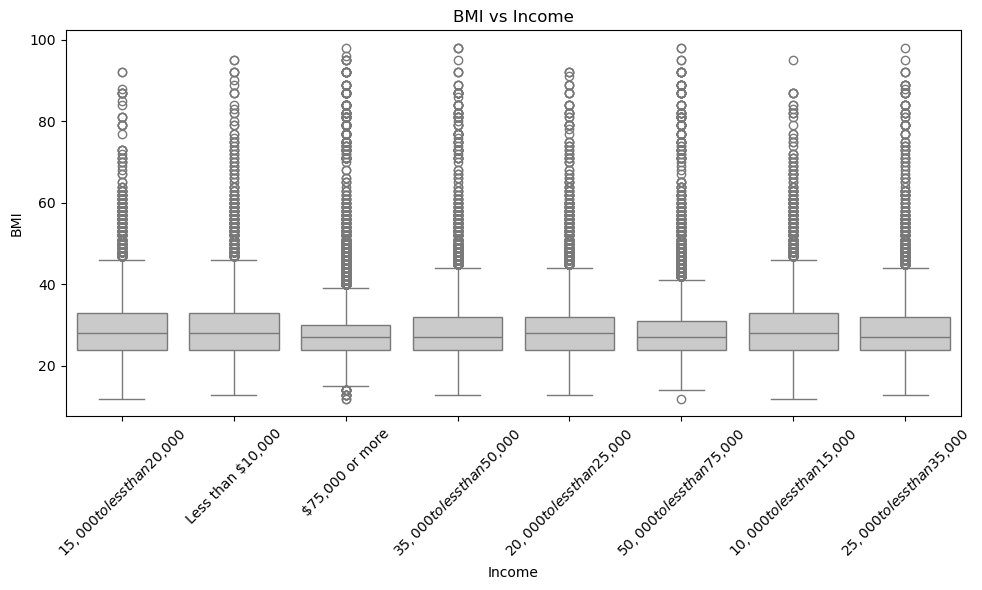

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', y='BMI', data=diabetes_df, hue='Income', palette=['#CACACA'])
plt.title('BMI vs Income')
plt.xlabel('Income')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Hide the legend
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.savefig('BMI_vs_Income.png')  # Save as PNG file
plt.show()


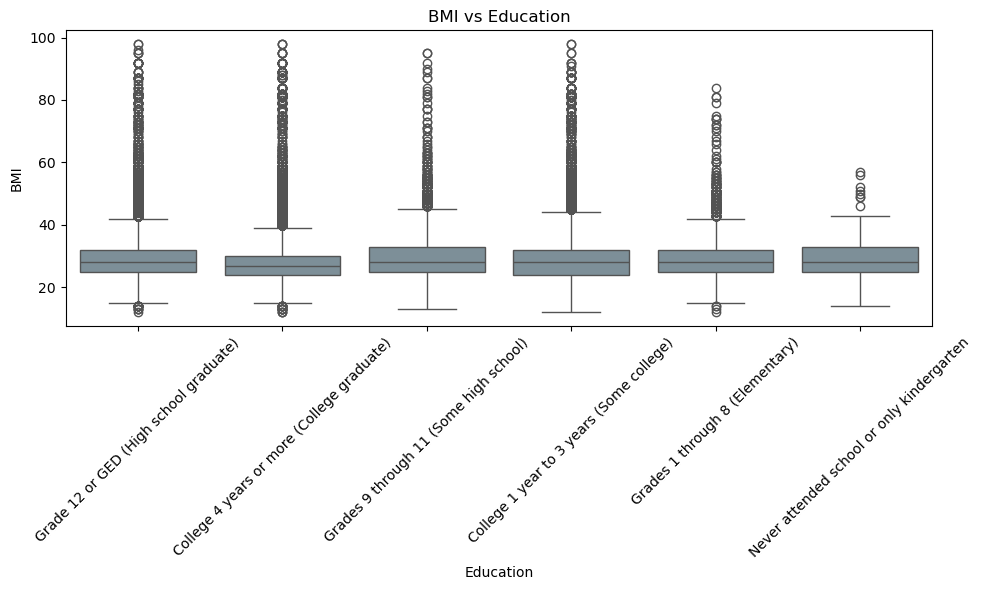

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='BMI', data=diabetes_df, hue='Education', palette=['#78909C'])
plt.title('BMI vs Education')
plt.xlabel('Education')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Hide the legend
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.savefig('BMI_vs_Education.png')  # Save as PNG file
plt.show()


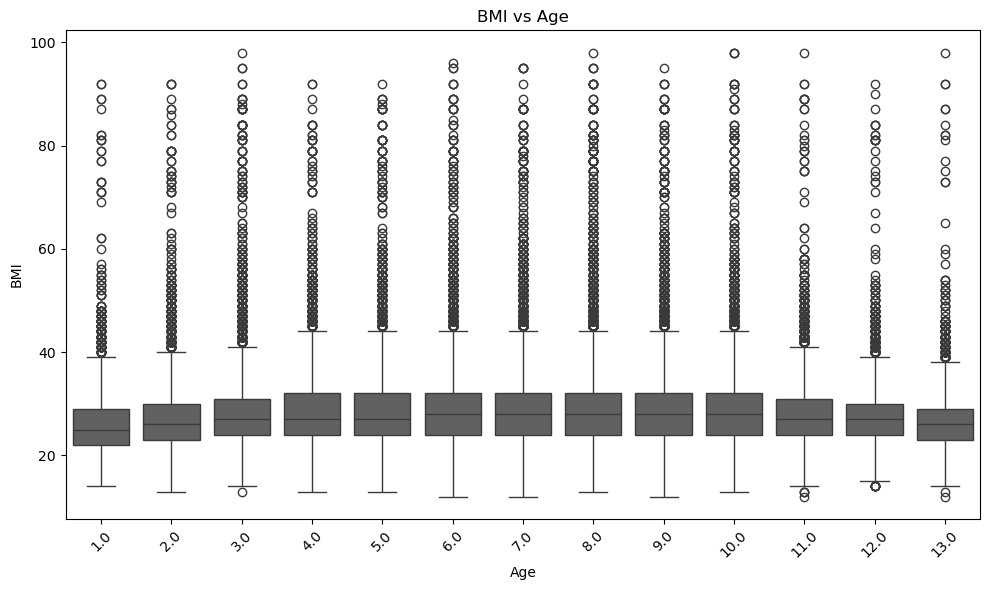

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='BMI', data=diabetes_df, hue='Age', palette=['#616161'])
plt.title('BMI vs Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Hide the legend
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.savefig('BMI_vs_Age.png')  # Save as PNG file
plt.show()


ANOVA Table:
                       sum_sq        df            F  PR(>F)
C(Diabetes_012)  5.612684e+05       2.0  6768.361067     0.0
Residual         1.051812e+07  253677.0          NaN     NaN
Tukey's HSD Test:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   0.0    1.0   2.9819   0.0 2.7578 3.2061   True
   0.0    2.0   4.2015   0.0 4.1148 4.2881   True
   1.0    2.0   1.2195   0.0 0.9837 1.4554   True
-------------------------------------------------


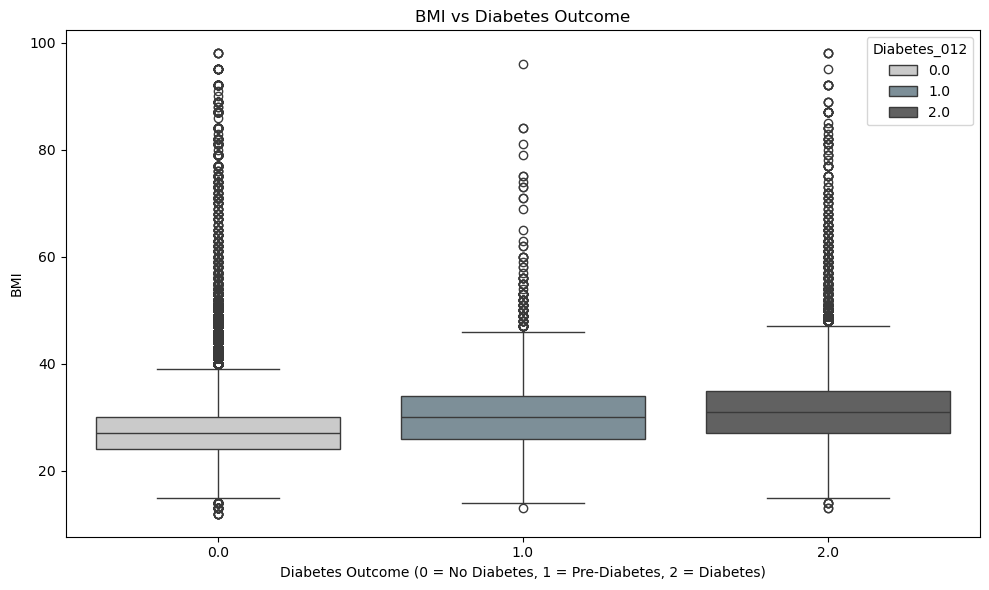

In [78]:
# Load the relevant dataset
data = diabetes_df

# Perform ANOVA
anova_model = ols('BMI ~ C(Diabetes_012)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA Table:")
print(anova_table)

# Check if ANOVA is significant (p < 0.05), then perform Tukey's HSD
if anova_table['PR(>F)'][0] < 0.05:
    tukey = mc.pairwise_tukeyhsd(data['BMI'], data['Diabetes_012'], alpha=0.05)
    print("Tukey's HSD Test:")
    print(tukey)

# Visualization of BMI vs Diabetes Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='BMI', data=data, hue='Diabetes_012', palette=['#CACACA','#78909C','#616161'])
plt.title('BMI vs Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No Diabetes, 1 = Pre-Diabetes, 2 = Diabetes)')
plt.ylabel('BMI')
plt.tight_layout()
plt.savefig('BMI_vs_Diabetes_Outcome.png')
plt.show()

## Sophia

In [80]:
diabetes_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Mapped_Age', 'Age_Cohort'],
      dtype='object')

In [81]:
# Trim the dataframe so it is only our variables of interest
df_trimmed = diabetes_df[["Diabetes_012", "Income", "Education", "Age", "HvyAlcoholConsump", "Fruits", "Veggies", "CholCheck", "HighChol", "PhysActivity", "BMI"]].copy()
df_trimmed.head()

,Diabetes_012,Income,Education,Age,HvyAlcoholConsump,Fruits,Veggies,CholCheck,HighChol,PhysActivity,BMI
0,0.0,"$15,000 to less than $20,000",Grade 12 or GED (High school graduate),9.0,0.0,0.0,1.0,1.0,1.0,0.0,40.0
1,0.0,"Less than $10,000",College 4 years or more (College graduate),7.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0
2,0.0,"$75,000 or more",Grade 12 or GED (High school graduate),9.0,0.0,1.0,0.0,1.0,1.0,0.0,28.0
3,0.0,"$35,000 to less than $50,000",Grades 9 through 11 (Some high school),11.0,0.0,1.0,1.0,1.0,0.0,1.0,27.0
4,0.0,"$20,000 to less than $25,000",College 1 year to 3 years (Some college),11.0,0.0,1.0,1.0,1.0,1.0,1.0,24.0


In [82]:
# Group by heavy alcohol consumption and diabetes status, count the number of participants for each category
alcohol_vs_diabetes = df_trimmed.groupby(["HvyAlcoholConsump", "Diabetes_012"]).size().reset_index(name='count')
alcohol_vs_diabetes
# Separate 0 fruit values from 1 fruit values, copying the tables so we can easily perform actions on them
no_alc = alcohol_vs_diabetes[alcohol_vs_diabetes["HvyAlcoholConsump"] == 0].copy()
yes_alc = alcohol_vs_diabetes[alcohol_vs_diabetes["HvyAlcoholConsump"] == 1].copy()

# Find the total respondents per category (fruit and no fruit)
# Create a new column for the proportion of respondents in each row out of their respective category
no_alc_sum = no_alc["count"].sum()
no_alc["proportion"] = (no_alc["count"] / no_alc_sum) * 100

yes_alc_sum = yes_alc["count"].sum()
yes_alc["proportion"] = (yes_alc["count"] / yes_alc_sum) * 100

# Using the pd.concat() function, combine the two tables into the new fruitstack df, which shows the proportions
alcoholstack = pd.concat([no_alc, yes_alc], ignore_index=False)
alcoholstack



,HvyAlcoholConsump,Diabetes_012,count,proportion
0,0.0,0.0,200487,83.737219
1,0.0,1.0,4423,1.847350
2,0.0,2.0,34514,14.415430
3,1.0,0.0,13216,92.704826
4,1.0,1.0,208,1.459035
5,1.0,2.0,832,5.836139


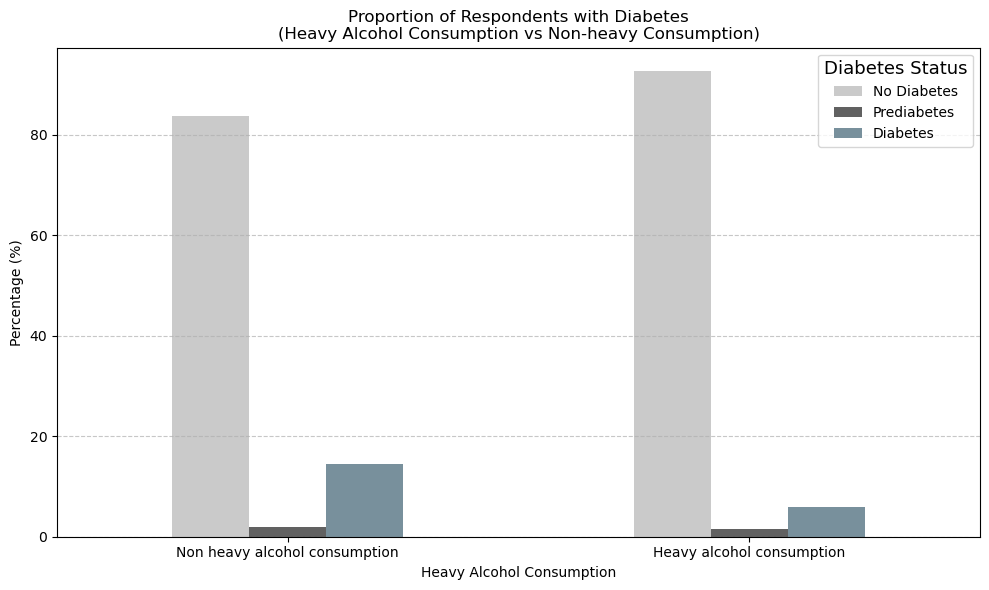

In [83]:
# Set up pivot table to reorganize fruitstack df
alc_pivot_df =alcoholstack.pivot(index='HvyAlcoholConsump', columns='Diabetes_012', values='proportion')

# Rename columns for easy display formatting
alc_pivot_df.columns = ['No Diabetes', 'Prediabetes', 'Diabetes']


# Rename indices for easy display formatting
index_mapping = {0.0: 'Non heavy alcohol consumption', 1.0: 'Heavy alcohol consumption'}
alc_pivot_df.index = alc_pivot_df.index.map(index_mapping)

# Plot the table
alc_pivot_df.plot(kind='bar', figsize=(10, 6), color = ['#cacaca', '#616161', '#78909c'])
plt.title('Proportion of Respondents with Diabetes\n(Heavy Alcohol Consumption vs Non-heavy Consumption)')
plt.xlabel('Heavy Alcohol Consumption')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=range(len(alc_pivot_df.index)), labels=alc_pivot_df.index, rotation=0)
plt.legend(title='Diabetes Status', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("images/diabetes_vs_alc.png")
plt.show()



In [84]:
# Running chi squared test
chi2, p, dof, expected = stats.chi2_contingency(alc_pivot_df)

print(f"Chi-squared statistics: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies")
print(expected)
if p>.05:
    print(f"The p-value of the chi-squared test is {round(p,4)}. This value is greater than .05 so it is a null hypothesis\
 and not statistically significant")
else:
    print(f"The p-value of the chi-squared test is {round(p,4)}. This value is less than .05, making it an alternative hypthesis\
    and statistically significant")

Chi-squared statistics: 4.1358763815397435
p-value: 0.1264462211103922
Degrees of freedom: 2
Expected frequencies
[[88.22102268  1.65319255 10.12578477]
 [88.22102268  1.65319255 10.12578477]]
The p-value of the chi-squared test is 0.1264. This value is greater than .05 so it is a null hypothesis and not statistically significant


In [85]:
# Group by heavy alcohol consumption and income status, count the number of participants for each category
alcohol_vs_diabetes_income = df_trimmed.groupby(["HvyAlcoholConsump", "Income"]).size().reset_index(name='count')
alcohol_vs_diabetes_income
# Separate 0 heavy alcohol consumption values from 1 heavy alcohol consumption values, copying the tables so we can easily perform actions on them
no_alc_income = alcohol_vs_diabetes_income[alcohol_vs_diabetes_income["HvyAlcoholConsump"] == 0].copy()
yes_alc_income = alcohol_vs_diabetes_income[alcohol_vs_diabetes_income["HvyAlcoholConsump"] == 1].copy()

# Find the total respondents per category (heavy alcohol consumption vs non heavy alcohol consumption)
# Create a new column for the proportion of respondents in each row out of their respective category
no_alc_sum_income = no_alc_income["count"].sum()
no_alc_income["proportion"] = (no_alc_income["count"] / no_alc_sum_income) * 100

yes_alc_sum_income = yes_alc_income["count"].sum()
yes_alc_income["proportion"] = (yes_alc_income["count"] / yes_alc_sum_income) * 100

# Using the pd.concat() function, combine the two tables into the new df, which shows the proportions
alcoholstack_income = pd.concat([no_alc_income, yes_alc_income], ignore_index=False)
alcoholstack_income



,HvyAlcoholConsump,Income,count,proportion
0,0.0,"$10,000 to less than $15,000",11396,4.759757
1,0.0,"$15,000 to less than $20,000",15373,6.420827
2,0.0,"$20,000 to less than $25,000",19316,8.067696
3,0.0,"$25,000 to less than $35,000",24704,10.318097
4,0.0,"$35,000 to less than $50,000",34550,14.430466
5,0.0,"$50,000 to less than $75,000",40605,16.959453
6,0.0,"$75,000 or more",84035,35.098821
7,0.0,"Less than $10,000",9445,3.944884
8,1.0,"$10,000 to less than $15,000",387,2.714646
9,1.0,"$15,000 to less than $20,000",621,4.356061


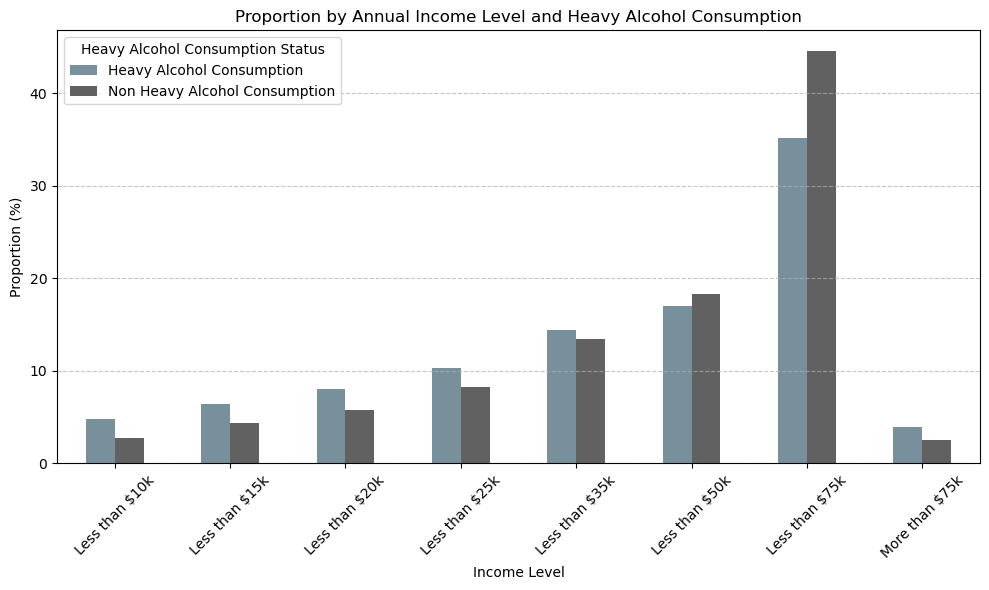

In [86]:
alcoholstack_income = alcoholstack_income.pivot(index='Income', columns='HvyAlcoholConsump', values='proportion')

# Rename columns for clarity
alcoholstack_income.columns = ['Heavy Alcohol Consumption', 'Non Heavy Alcohol Consumption']

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
alcoholstack_income.plot(kind='bar', ax=ax, color=['#78909c', '#616161'])

# Formatting
plt.title('Proportion by Annual Income Level and Heavy Alcohol Consumption')
plt.xlabel('Income Level')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)  # Rotate x labels to horizontal
ax.set_xticklabels(['Less than $10k', 'Less than $15k', 'Less than $20k', 'Less than $25k', 'Less than $35k', 'Less than $50k', 'Less than $75k', 'More than $75k'], rotation=45)
plt.legend(title='Heavy Alcohol Consumption Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [87]:
#Heavy Alcohol Consumption and Age

alcohol_vs_diabetes_age = df_trimmed.groupby(["HvyAlcoholConsump", "Age"]).size().reset_index(name='count')
alcohol_vs_diabetes_age

# Separate 0 Heavy Alcohol Consumption values from 1 Heavy Alcohol Consumption values
no_alc_age = alcohol_vs_diabetes_age[alcohol_vs_diabetes_age["HvyAlcoholConsump"] == 0].copy()
yes_alc_age = alcohol_vs_diabetes_age[alcohol_vs_diabetes_age["HvyAlcoholConsump"] == 1].copy()

# Find the total respondents per category (Heavy Alcohol Consumption and no Heavy Alcohol Consumption)
# Create a new column for the proportion of respondents in each row out of their respective category
no_alc_sum_age = no_alc_age["count"].sum()
no_alc_age["proportion"] = (no_alc_age["count"] / no_alc_sum_age) * 100

yes_alc_sum_age = yes_alc_age["count"].sum()
yes_alc_age["proportion"] = (yes_alc_age["count"] / yes_alc_sum_age) * 100

# Using the pd.concat() function, combine the two tables into the new Heavy Alcohol Consumption df
alcoholstack_age = pd.concat([no_alc_age, yes_alc_age], ignore_index=False)
alcoholstack_age

,HvyAlcoholConsump,Age,count,proportion
0,0.0,1.0,5259,2.196522
1,0.0,2.0,7078,2.956262
2,0.0,3.0,10445,4.362553
3,0.0,4.0,13002,5.430533
4,0.0,5.0,15245,6.367365
5,0.0,6.0,18578,7.759456
6,0.0,7.0,24595,10.272571
7,0.0,8.0,28898,12.069801
8,0.0,9.0,31365,13.100190
9,0.0,10.0,30412,12.702152


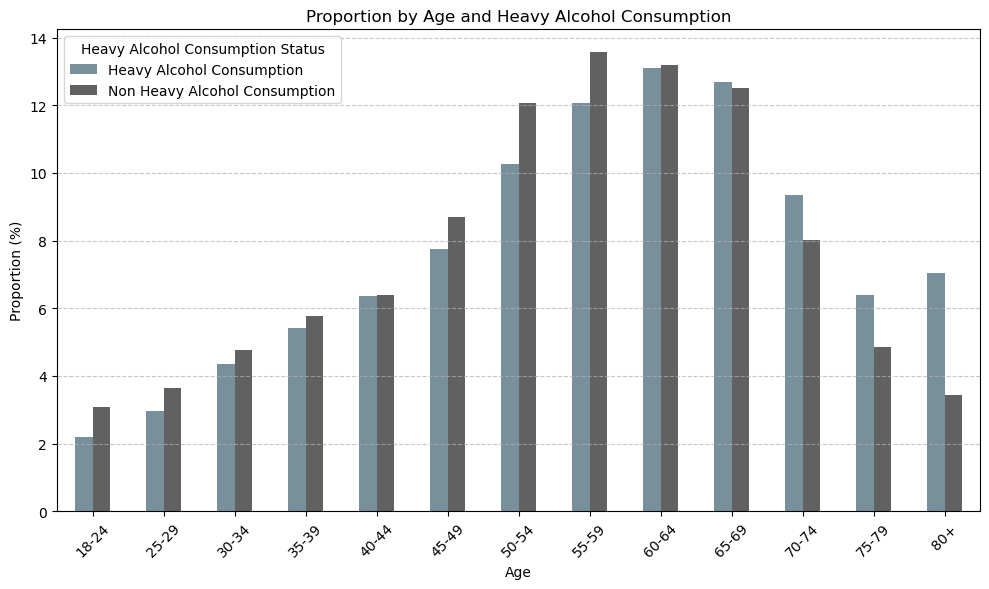

In [88]:
alcoholstack_age = alcoholstack_age.pivot(index='Age', columns='HvyAlcoholConsump', values='proportion')

# Rename columns for clarity
alcoholstack_age.columns = ['Heavy Alcohol Consumption', 'Non Heavy Alcohol Consumption']

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
alcoholstack_age.plot(kind='bar', ax=ax, color=['#78909c', '#616161'])

# Formatting
plt.title('Proportion by Age and Heavy Alcohol Consumption')
plt.xlabel('Age')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)  # Rotate x labels to horizontal
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+' ], rotation=45)
plt.legend(title='Heavy Alcohol Consumption Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [89]:
#Heavy Alcohol Consumption to Education
alcohol_vs_diabetes_edu = df_trimmed.groupby(["HvyAlcoholConsump", "Education"]).size().reset_index(name='count')


# Separate 0 PhysActivity values from 1 PhysActivity values, copying the tables so we can easily perform actions on them
no_alc_edu = alcohol_vs_diabetes_edu[alcohol_vs_diabetes_edu["HvyAlcoholConsump"] == 0].copy()
yes_alc_edu = alcohol_vs_diabetes_edu[alcohol_vs_diabetes_edu["HvyAlcoholConsump"] == 1].copy()

# Find the total respondents per category (PhysActivity and no PhysActivity)
# Create a new column for the proportion of respondents in each row out of their respective category
no_alc_edu_sum = no_alc_edu["count"].sum()
no_alc_edu["proportion"] = (no_alc_edu["count"] / no_alc_edu_sum) * 100

yes_alc_edu_sum = yes_alc_edu["count"].sum()
yes_alc_edu["proportion"] = (yes_alc_edu["count"] / yes_alc_edu_sum) * 100

# Using the pd.concat() function, combine the two tables into the new PhysActivity df, which shows the proportions
alcoholstack_edu = pd.concat([no_alc_edu, yes_alc_edu], ignore_index=False)
alcoholstack_edu

,HvyAlcoholConsump,Education,count,proportion
0,0.0,College 1 year to 3 years (Some college),65942,27.541934
1,0.0,College 4 years or more (College graduate),100830,42.113573
2,0.0,Grade 12 or GED (High school graduate),59439,24.825832
3,0.0,Grades 1 through 8 (Elementary),3938,1.644781
4,0.0,Grades 9 through 11 (Some high school),9108,3.804130
5,0.0,Never attended school or only kindergarten,167,0.069751
6,1.0,College 1 year to 3 years (Some college),3968,27.833895
7,1.0,College 4 years or more (College graduate),6495,45.559764
8,1.0,Grade 12 or GED (High school graduate),3311,23.225309
9,1.0,Grades 1 through 8 (Elementary),105,0.736532


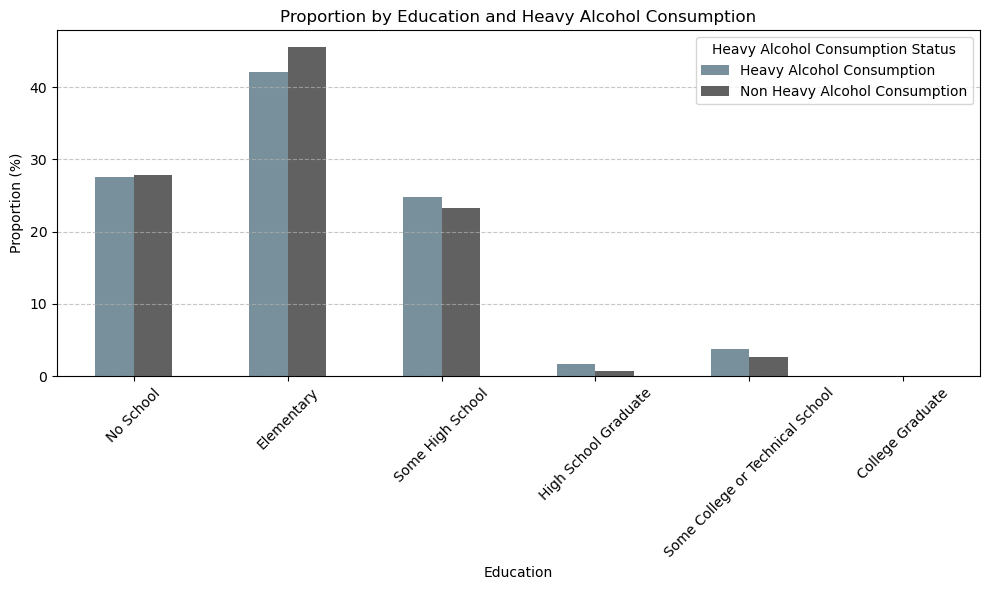

In [90]:
alcoholstack_edu = alcoholstack_edu.pivot(index='Education', columns='HvyAlcoholConsump', values='proportion')

# Rename columns for clarity
alcoholstack_edu.columns = ['Heavy Alcohol Consumption', 'Non Heavy Alcohol Consumption']

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
alcoholstack_edu.plot(kind='bar', ax=ax, color=['#78909c', '#616161'])

# Formatting
plt.title('Proportion by Education and Heavy Alcohol Consumption')
plt.xlabel('Education')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)  # Rotate x labels to horizontal
ax.set_xticklabels(['No School', 'Elementary', 'Some High School', 'High School Graduate', 'Some College or Technical School', 'College Graduate'], rotation=45)
plt.legend(title='Heavy Alcohol Consumption Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

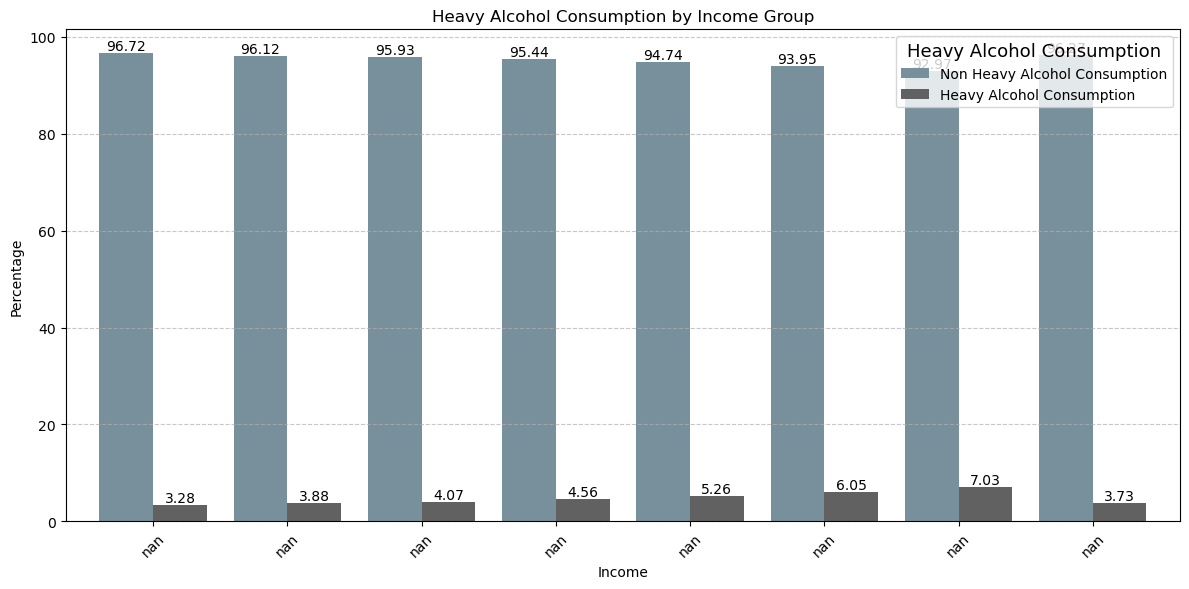

In [91]:
# Group by income and Heavy Alcohol Consumption, count the number of responses in each row
income_alc = df_trimmed.groupby(['Income', 'HvyAlcoholConsump']).size().reset_index(name='count')

# Calculate the sum of responses for each income group
income_alc_group_sum = income_alc.groupby('Income')['count'].transform('sum')

# Calculate the proportions
income_alc['proportion'] = (income_alc['count'] / income_alc_group_sum) * 100

# Pivot the table
income_alc_pivot_df = income_alc.pivot(index='Income', columns='HvyAlcoholConsump', values='proportion')

# Rename columns for easy display formatting
income_alc_pivot_df.columns = ['Non Heavy Alcohol Consumption', 'Heavy Alcohol Consumption']

# Rename indices for easy display formatting
index_mapping = {1.0: 'Less than \$10k',
                 2.0: '\$10k to \$15k',
                 3.0: '\$15k to \$20k',
                 4.0: '\$20k to \$25k',
                 5.0: '\$25k to \$35k',
                 6.0: '\$35k to \$50k',
                 7.0: '\$50k to \$75k',
                 8.0: 'More than \$75k'
                }

income_alc_pivot_df.index = income_alc_pivot_df.index.map(index_mapping)

# Plot the table
ax = income_alc_pivot_df.plot(kind='bar', width = .8, figsize=(12, 6), color=['#78909c', '#616161'] )
plt.title('Heavy Alcohol Consumption by Income Group')
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(income_alc_pivot_df.index)), labels=income_alc_pivot_df.index, rotation=45)
plt.legend(title='Heavy Alcohol Consumption', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the percentages?
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.savefig("images/income_vs_alc.png")
plt.show()



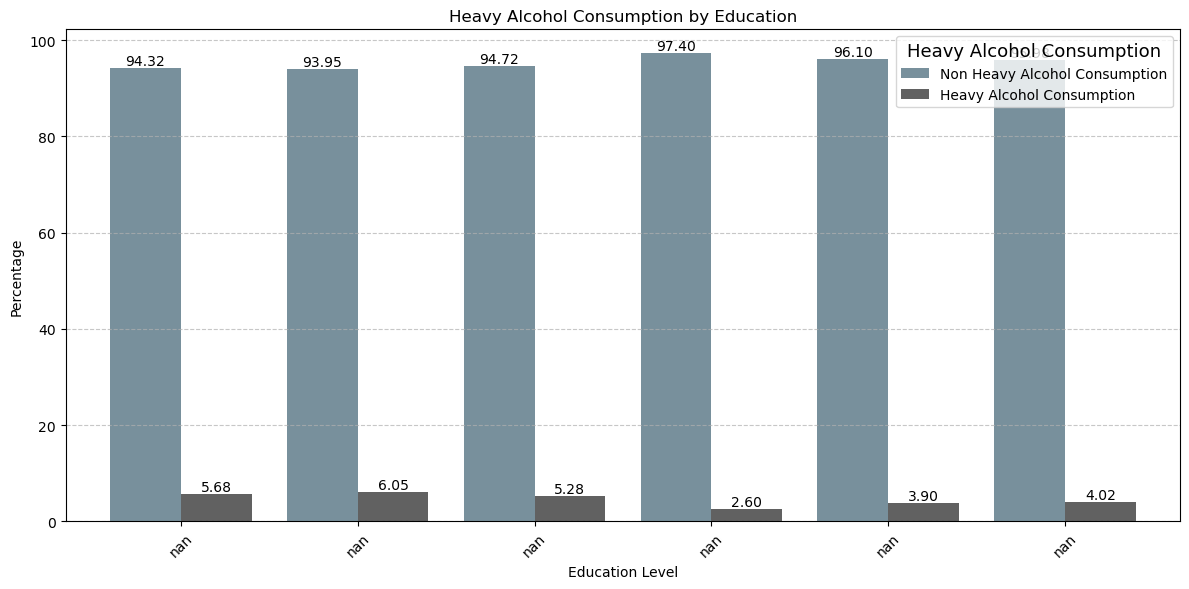

In [92]:
# Group by education and heavy alcohol consumption, count the number of responses in each row
edu_alc = df_trimmed.groupby(['Education', 'HvyAlcoholConsump']).size().reset_index(name='count')

# Calculate the sum of responses for each education group
edu_alc_group_sum = edu_alc.groupby('Education')['count'].transform('sum')

# Calculate the proportions
edu_alc['proportion'] = (edu_alc['count'] / edu_alc_group_sum) * 100

# Pivot the table
edu_alc_pivot_df = edu_alc.pivot(index='Education', columns='HvyAlcoholConsump', values='proportion')

# Rename columns for easy display formatting
edu_alc_pivot_df.columns = ['Non Heavy Alcohol Consumption', 'Heavy Alcohol Consumption']

# Rename indices for easy display formatting
index_mapping = {1.0: 'No schooling',
                 2.0: 'Grades 1 through 8',
                 3.0: 'Grades 9 through 11',
                 4.0: 'High school or GED',
                 5.0: 'College, 1-3 years',
                 6.0: 'College, 4+ years',
                }

edu_alc_pivot_df.index = edu_alc_pivot_df.index.map(index_mapping)

# Plot the table
ax = edu_alc_pivot_df.plot(kind='bar', width = .8, figsize=(12, 6), color=['#78909c', '#616161'])
plt.title('Heavy Alcohol Consumption by Education')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(edu_alc_pivot_df.index)), labels=edu_alc_pivot_df.index, rotation=45)
plt.legend(title='Heavy Alcohol Consumption', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the percentages?
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.savefig("images/edu_vs_alc.png")
plt.show()

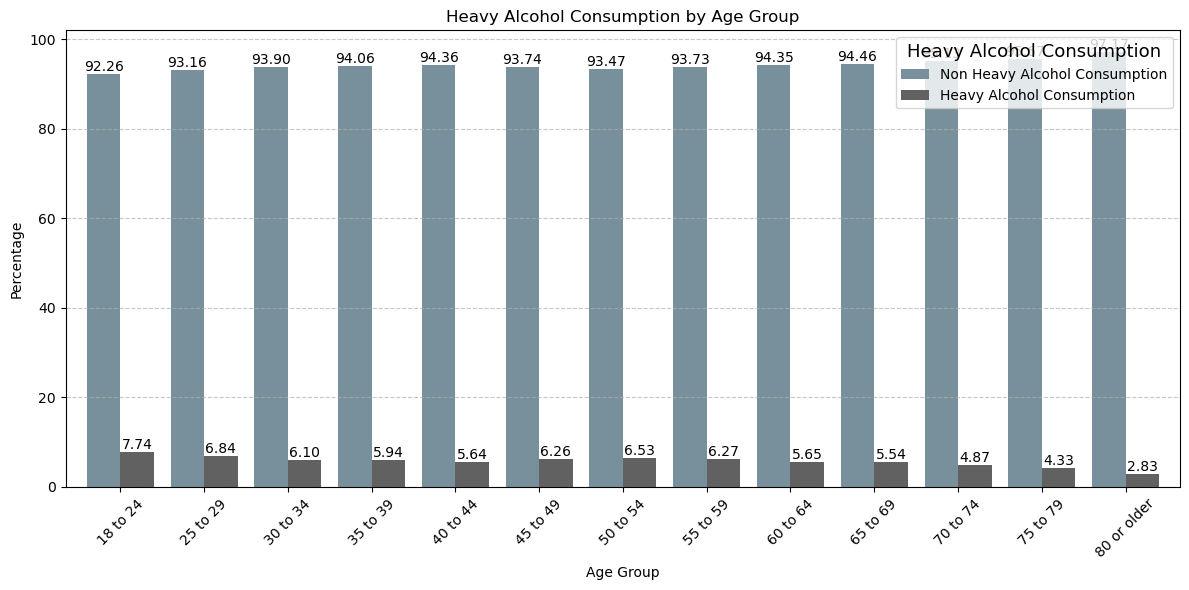

In [93]:
# Group by age and fruits, count the number of responses in each row
age_alc = df_trimmed.groupby(['Age', 'HvyAlcoholConsump']).size().reset_index(name='count')

# Calculate the sum of responses for each age group
age_alc_group_sum = age_alc.groupby('Age')['count'].transform('sum')

# Calculate the proportions
age_alc['proportion'] = (age_alc['count'] / age_alc_group_sum) * 100

# Pivot the table
age_alc_pivot_df = age_alc.pivot(index='Age', columns='HvyAlcoholConsump', values='proportion')

# Rename columns for easy display formatting
age_alc_pivot_df.columns = ['Non Heavy Alcohol Consumption', 'Heavy Alcohol Consumption']

# Rename indices for easy display formatting
index_mapping = {1.0: '18 to 24',
                 2.0: '25 to 29',
                 3.0: '30 to 34',
                 4.0: '35 to 39',
                 5.0: '40 to 44',
                 6.0: '45 to 49',
                 7.0: '50 to 54',
                 8.0: '55 to 59',
                 9.0: '60 to 64',
                 10.0: '65 to 69',
                 11.0: '70 to 74',
                 12.0: '75 to 79',
                 13.0: '80 or older'
                }

age_alc_pivot_df.index = age_alc_pivot_df.index.map(index_mapping)

# Plot the table
ax = age_alc_pivot_df.plot(kind='bar', width = .8, figsize=(12, 6), color=['#78909c', '#616161'])
plt.title('Heavy Alcohol Consumption by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(age_alc_pivot_df.index)), labels=age_alc_pivot_df.index, rotation=45)
plt.legend(title='Heavy Alcohol Consumption', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label the percentages?
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')

# Display the plot
plt.tight_layout()
plt.savefig("images/age_vs_alc.png")
plt.show()


## Conclusions and Bonus Workspace